# **Importing Library**




In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style(style = 'whitegrid')
pd.set_option('display.max_colwidth', -1)

# **Importing Data**

In [4]:
df_carwala=pd.read_csv('/content/df_carwala.csv')
df_carwala.head()

,Unnamed: 0,Car Available at,No. of Owner(s),Registered at,Kilometer,Transmission,Year,Price,Fuel Type,cc,bhp,milage,Person,name
0,0,"Rajinder Palace, Delhi",First,Not Available,"74,000 km",Automatic,Jun 2016,₹ 18.5 Lakh,Petrol,"2494 cc, 4 Cylinders Inline, 4 Valves/Cylinder, DOHC",158 bhp @ 5700 rpm,19.16 kmpl,5 Person,2016 Toyota Camry
1,0,"Sector 10, Noida",First,Not Available,"54,000 km",Manual,Jun 2015,₹ 3.7 Lakh,Petrol,"1197 cc, 4 Cylinders Inline, 4 Valves/Cylinder, DOHC",81 bhp @ 6000 rpm,19.77 kmpl,5 Person,2015 Hyundai Grand i10
2,0,"Sector 10, Noida\nDelivery available in Delhi",First,Not Available,"54,000 km",Manual,Jun 2015,₹ 3.7 Lakh,Petrol,"1197 cc, 4 Cylinders Inline, 4 Valves/Cylinder, DOHC",81 bhp @ 6000 rpm,19.77 kmpl,5 Person,2015 Hyundai Grand i10
3,0,"Preet Vihar, Delhi",First,Not Available,"8,000 km",Manual,Jun 2018,₹ 8.5 Lakh,Petrol,"1462 cc, 4 Cylinders Inline, 4 Valves/Cylinder, DOHC",103 bhp @ 6000 rpm,21.56 kmpl,5 Person,2018 Maruti Suzuki Ciaz
4,0,"Sector 10, Noida",First,Not Available,"38,906 km",Manual,Jul 2017,₹ 3 Lakh,Petrol,"814 cc, 3 Cylinders Inline, 3 Valves/Cylinder, SOHC",55 bhp @ 5500 rpm,21.1 kmpl,5 Person,2017 Hyundai Eon


In [5]:
df_carwala.shape[0]

1843

In [6]:
df_carwala.index=range(df_carwala.shape[0])


In [7]:
df_carwala['Car Available at']=[i.split(',')[-1].split()[-1] for i in df_carwala['Car Available at']]

In [8]:
di={'First':1, 'Second':2, 'Third':3, 'UnRegistered Car':0, 'Fourth':4}
df_carwala['No. of Owner(s)']=df_carwala['No. of Owner(s)'].map(di)

In [9]:
df_carwala['Kilometer']=[i.split(' ')[0] for i in df_carwala['Kilometer']]

In [10]:
df_carwala.drop('Registered at',axis=1,inplace=True)

In [11]:
import datetime
day=[datetime.datetime.strptime('Sep 2021',"%b %Y")-datetime.datetime.strptime(i,"%b %Y")  for i in df_carwala['Year']]
df_carwala['Year']=[i.days for i in day]

In [12]:
def ex_num(i):
  k=[]
  for j in i:
    if j.isdigit() or j == '.':
      k.append(j)
  l=''.join(k)
  return(l)

In [13]:
import re

def isfloat(item):

    # A float is a float
    if isinstance(item, float):
        return True

    # Ints are okay
    if isinstance(item, int):
        return True

   # Detect leading white-spaces
    if len(item) != len(item.strip()):
        return False

    # Some strings can represent floats or ints ( i.e. a decimal )
    if isinstance(item, str):
        # regex matching
        int_pattern = re.compile("^[0-9]*$")
        float_pattern = re.compile("^[0-9]*.[0-9]*$")
        if float_pattern.match(item) or int_pattern.match(item):
            return True
        else:
            return False


In [14]:

p=[]
for i in df_carwala['Price']:
  tt=0
  for k in i.split():
    tem=ex_num(k)
    if isfloat(tem) and tem!='':
      temp=float(tem)
      if 'Lakh' in i.split():
        temp=temp*100000
      if 'Crore' in i.split():
        temp=temp*10000000
      p.append(temp)
  

In [15]:
df_carwala['Price']=p

In [16]:
temp=[]
cc=[]
for i in range(len(df_carwala['cc'])):
  try:
    cc.append(df_carwala['cc'][i].split(',')[0])
  except:
    temp.append(i)

  

In [17]:
df_carwala.drop(df_carwala.index[temp],inplace=True)

In [18]:
df_carwala['cc']=cc

In [19]:
df_carwala['cc']=[i.split()[0] for i in df_carwala['cc']]
  

In [20]:
bhp=[]
for i in df_carwala['bhp']:
  try:
    bhp.append(i.split()[0])
  except:
    bhp.append(i)

In [21]:
df_carwala['bhp']=bhp

In [22]:
mil=[]
for i in df_carwala['milage']:
  try:
    mil.append(i.split()[0])
  except:
    mil.append(i)

In [23]:
df_carwala['milage']=mil

In [24]:
per=[]
for i in df_carwala['Person']:
  try:
    per.append(i.split()[0])
  except:
    per.append(i)

In [25]:
df_carwala['Person']=per

In [26]:
import re
r=re.compile('.*\d{4}-\d{4}.*')
n=[]
for i in df_carwala['name']:
  k=[]
  for j in i.split():
    if r.match(j) or re.compile('\d{4}').match(j):
      l=0
    else:
      k.append(j)
  n.append(' '.join(k))
  

In [27]:
df_carwala['c_name']=[i.split()[0] for i in n]
df_carwala['name']=n

In [28]:
pd.Series([i.split()[0] for i in df_carwala['name']]).value_counts()

Maruti           316
Hyundai          270
Honda            161
Mercedes-Benz    152
Toyota           150
BMW              95 
Audi             92 
Ford             90 
Mahindra         87 
Volkswagen       65 
Renault          53 
Skoda            45 
Nissan           22 
Land             20 
Tata             20 
Jaguar           18 
Volvo            16 
Porsche          14 
Datsun           13 
Jeep             12 
MINI             11 
MG               11 
Kia              9  
Chevrolet        6  
Mitsubishi       5  
Fiat             5  
Bentley          3  
Ssangyong        3  
Lamborghini      3  
Isuzu            2  
Lexus            1  
dtype: int64

In [29]:
c_name=[i.split()[1] for i in df_carwala['name']]

In [30]:
d={'Noida':'UP','Faridabad':'UP', 'Delhi':'DL', 'Mumbai':'MH','Pune':'MH', 'Chandigarh':'PB','Bangalore':'KA','Chennai':'TN','Hyderabad':'AP','Kolkata':'WB','Ahmedabad':'GJ',}
df_carwala['Car Available at']=df_carwala['Car Available at'].map(d)

In [31]:

c=re.compile('.*[a-z]')
n=re.compile('.*[0-9]')
l=[]
for i in df_carwala['name']:
  k=[]
  for j in i.split():
    if n.match(j) and not re.compile('.*[a-zA-z]').match(j):
      break
    if not c.match(j):
      break
    k.append(j)
  l.append(' '.join(k))


In [32]:
df_carwala.drop(['Unnamed: 0'],axis=1,inplace=True)

In [33]:
df_carwala

,Car Available at,No. of Owner(s),Kilometer,Transmission,Year,Price,Fuel Type,cc,bhp,milage,Person,name,c_name
0,DL,1,"74,000",Automatic,1918,1850000.0,Petrol,2494,158,19.16,5,Toyota Camry,Toyota
1,UP,1,"54,000",Manual,2284,370000.0,Petrol,1197,81,19.77,5,Hyundai Grand i10,Hyundai
2,DL,1,"54,000",Manual,2284,370000.0,Petrol,1197,81,19.77,5,Hyundai Grand i10,Hyundai
3,DL,1,"8,000",Manual,1188,850000.0,Petrol,1462,103,21.56,5,Maruti Suzuki Ciaz,Maruti
4,UP,1,"38,906",Manual,1523,300000.0,Petrol,814,55,21.1,5,Hyundai Eon,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,PB,1,"63,300",Automatic,3014,1650000.0,Diesel,1968,177,16.66,5,Audi A6,Audi
1839,PB,1,"54,500",Automatic,2649,2800000.0,Diesel,2967,241,12.07,7,Audi Q7,Audi
1840,PB,4,"74,000",Automatic,3014,1600000.0,Diesel,1968,174,12.8,5,Audi Q5,Audi
1841,PB,1,"43,000",Automatic,1188,3000000.0,Diesel,1968,184,15.17,5,Audi Q3,Audi


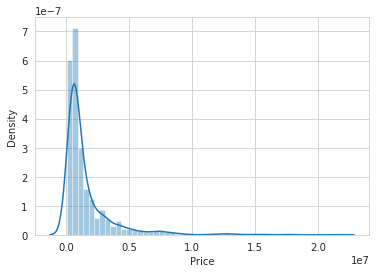

In [34]:
sns.distplot(df_carwala['Price'])

In [35]:
df_car24=pd.read_csv('/content/df_car24.csv')
df_car24

,Unnamed: 0,Insurance,Owner,Kilometers Driven,Registration,Year of Purchase,Transmission,History,Fuel Type,Seating capacity,Max power (bhp),Fuel type,Transmission type,Mileage (kmpl),Heading,Price
0,0,Valid upto May 2022\nZero_Dep,1st Owner,"27,711 km",UP-14-x-xxxx,April 2019,MANUAL,Non-Accidental,Diesel,5,89,Diesel,Manual,24.29,2019 Maruti Vitara Brezza VDI | MANUAL,"₹8,43,699\n₹8,15,699"
1,0,Valid upto Sep 2022\n3rd Party,2nd Owner,"66,285 km",DL-8C-x-xxxx,July 2015,MANUAL,Non-Accidental,Petrol,5,85,Petrol,Manual,18.60,2015 Maruti Swift ZXI | MANUAL,"₹4,52,699\n₹4,22,699"
2,0,Valid upto Jan 2022\nComp,1st Owner,"72,575 km",HR-36-x-xxxx,January 2014,MANUAL,Non-Accidental,Diesel,5,75,Diesel,Manual,14.00,2014 Maruti Swift Dzire VDI BS IV | MANUAL,"₹4,24,999\n₹4,01,999"
3,0,Valid upto Sep 2022\n3rd Party,1st Owner,"79,600 km",HR-26-x-xxxx,November 2015,MANUAL,Non-Accidental,Diesel,5,89,Diesel,Manual,26.21,2015 Maruti Ciaz VDI | MANUAL,"₹5,00,000\n₹4,44,000"
4,0,Valid upto Sep 2022\n3rd Party,3rd Owner,"70,965 km",DL-2C-x-xxxx,January 2013,MANUAL,Non-Accidental,Petrol,5,67,Petrol,Manual,19.30,2013 Maruti Wagon R 1.0 LXI | MANUAL,"₹2,30,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,0,Valid upto Sep 2022\n3rd Party,1st Owner,"1,17,419 km",CH-01-x-xxxx,September 2010,MANUAL,Non-Accidental,Petrol,5,85,Petrol,Manual,19.10,2010 Maruti Swift Dzire VXI | MANUAL,"₹2,85,699\n₹2,63,699"
831,0,Valid upto Apr 2022\nZero_Dep,1st Owner,"78,878 km",DL-12-x-xxxx,March 2016,MANUAL,Non-Accidental,Diesel,5,126,Diesel,Manual,19.67,2016 Hyundai Creta 1.6 SX PLUS DIESEL | MANUAL,"₹8,09,199\n₹7,59,199"
832,0,Valid upto Apr 2022\nComp,2nd Owner,"1,24,320 km",CH-01-x-xxxx,February 2014,MANUAL,Non-Accidental,Diesel,5,70,Diesel,Manual,24.00,2014 Hyundai Grand i10 ASTA 1.1 CRDI | MANUAL,"₹3,79,599\n₹3,60,599"
833,0,Valid upto Jan 2022\nThird_party,1st Owner,"1,27,836 km",PB-12-x-xxxx,January 2015,MANUAL,Non-Accidental,Petrol,5,55,Petrol,Manual,21.10,2015 Hyundai Eon MAGNA PLUS | MANUAL,"₹3,18,699\n₹2,68,699"


In [36]:
df_car24.drop(['Unnamed: 0','Insurance','History'],axis=1,inplace=True)

In [37]:
o={'1st Owner':1, '2nd Owner':2, '3rd Owner':3, '4th Owner':4}
df_car24['Owner']=df_car24['Owner'].map(o)

In [38]:
df_car24['Kilometers Driven']=[i.split()[0].replace(',','') for i in df_car24['Kilometers Driven']]

In [39]:
df_car24['Registration']=[i.split('-')[0] for i in df_car24['Registration']]

In [40]:
import datetime
day=[datetime.datetime.strptime('Sep 2021',"%b %Y")-datetime.datetime.strptime(i,"%B %Y")  for i in df_car24['Year of Purchase']]
df_car24['Year of Purchase']=[i.days for i in day]

In [41]:
import re
r=re.compile('.*\d{4}-\d{4}.*')
n=[]
for i in df_car24['Heading']:
  k=[]
  for j in i.split():
    if r.match(j) or re.compile('\d{4}').match(j):
      l=0
    else:
      k.append(j)
  n.append(' '.join(k))
  

In [42]:
n=[i.split('|')[0] for i in n]

In [43]:
df_car24['c_name']=[i.split()[0] for i in n]
df_car24['Heading']=n

In [44]:
df_car24['Price']=[i.split('\n')[0].replace('₹','').replace(',','') for i in df_car24['Price']]

In [45]:

c=re.compile('.*[a-z]')
n=re.compile('.*[0-9]')
l=[]
for i in df_car24['Heading']:
  k=[]
  for j in i.split():
    if n.match(j) and not re.compile('.*[a-zA-z]').match(j):
      break
    if not c.match(j):
      break
    k.append(j)
  l.append(' '.join(k))


In [46]:
df_car24['name']=l

In [47]:
df_car24

,Owner,Kilometers Driven,Registration,Year of Purchase,Transmission,Fuel Type,Seating capacity,Max power (bhp),Fuel type,Transmission type,Mileage (kmpl),Heading,Price,c_name,name
0,1,27711,UP,884,MANUAL,Diesel,5,89,Diesel,Manual,24.29,Maruti Vitara Brezza VDI,843699,Maruti,Maruti Vitara Brezza
1,2,66285,DL,2254,MANUAL,Petrol,5,85,Petrol,Manual,18.60,Maruti Swift ZXI,452699,Maruti,Maruti Swift
2,1,72575,HR,2800,MANUAL,Diesel,5,75,Diesel,Manual,14.00,Maruti Swift Dzire VDI BS IV,424999,Maruti,Maruti Swift Dzire
3,1,79600,HR,2131,MANUAL,Diesel,5,89,Diesel,Manual,26.21,Maruti Ciaz VDI,500000,Maruti,Maruti Ciaz
4,3,70965,DL,3165,MANUAL,Petrol,5,67,Petrol,Manual,19.30,Maruti Wagon R 1.0 LXI,230000,Maruti,Maruti Wagon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,1,117419,CH,4018,MANUAL,Petrol,5,85,Petrol,Manual,19.10,Maruti Swift Dzire VXI,285699,Maruti,Maruti Swift Dzire
831,1,78878,DL,2010,MANUAL,Diesel,5,126,Diesel,Manual,19.67,Hyundai Creta 1.6 SX PLUS DIESEL,809199,Hyundai,Hyundai Creta
832,2,124320,CH,2769,MANUAL,Diesel,5,70,Diesel,Manual,24.00,Hyundai Grand i10 ASTA 1.1 CRDI,379599,Hyundai,Hyundai Grand i10
833,1,127836,PB,2435,MANUAL,Petrol,5,55,Petrol,Manual,21.10,Hyundai Eon MAGNA PLUS,318699,Hyundai,Hyundai Eon


In [48]:
df_cd=pd.read_csv('/content/df_cd.csv')
df_cd

,Unnamed: 0,Insurance Type,RTO,Make Year,Transmission,Seats,No Of Owner(s),Engine,Engine Displacement,Fuel,Reg. year,KMs Driven,name,price,Mileage
0,0,Third Party insurance,GJ01,2012,Manual,5,1st Owner,998 CC,998 cc,Petrol,Mar 2012,"89,579 Kms",2012 Maruti Alto K10,"₹ 1,77,500",20.92 kmpl
1,1,Third Party insurance,GJ01,2011,Manual,5,1st Owner,1497 CC,1497 cc,Petrol,Aug 2011,"38,647 Kms",2011 Honda City,"₹ 3,99,500",17 kmpl
2,2,Third Party insurance,GJ09,2019,Manual,5,1st Owner,1197 CC,1197 cc,Petrol,Nov 2019,"9,718 Kms",2019 Maruti Swift Dzire,"₹ 6,65,000",21.21 kmpl
3,3,Third Party insurance,GJ18,2016,Manual,5,1st Owner,998 CC,998 cc,Petrol,Apr 2016,"81,674 Kms",2016 Maruti Wagon R,"₹ 3,60,000",21.79 kmpl
4,4,Third Party insurance,GJ38,2019,Manual,5,1st Owner,1196 CC,1196 cc,Petrol,Jul 2019,"14,161 Kms",2019 Maruti Eeco,"₹ 4,57,000",15.37 kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,1887,Third Party insurance,MH12,2019,Manual,5,1st Owner,1591 CC,1591 cc,Petrol,Apr 2019,"8,103 Kms",2019 Hyundai Verna,"₹ 9,60,500",17 kmpl
1888,1888,Third Party insurance,MH09,2014,Manual,5,2nd Owner,1497 CC,1497 cc,Petrol,Dec 2014,"33,378 Kms",2014 Honda City,"₹ 6,44,836",17.4 kmpl
1889,1889,Third Party insurance,MH11,2012,Manual,5,1st Owner,1197 CC,1197 cc,Petrol,Dec 2012,"32,108 Kms",2012 Maruti Swift,"₹ 3,60,000",18.6 kmpl
1890,1890,Third Party insurance,MH12,2015,Manual,5,1st Owner,1197 CC,1197 cc,Petrol,Apr 2015,"45,370 Kms",2015 Hyundai i20,"₹ 5,29,500",18.6 kmpl


In [49]:
df_cd.drop(['Unnamed: 0','Insurance Type','Engine Displacement','Make Year'],axis=1,inplace=True)

In [50]:
df_cd['KMs Driven']=[i.split()[0].replace(',','') for i in df_cd['KMs Driven']]

In [51]:
df_cd['Engine']=[i.split()[0] for i in df_cd['Engine']]

In [52]:
import datetime
day=[datetime.datetime.strptime('Sep 2021',"%b %Y")-datetime.datetime.strptime(i,"%b %Y")  for i in df_cd['Reg. year']]
df_cd['Reg. year']=[i.days for i in day]

In [53]:
l=[]
for i in df_cd['RTO']:
  k=[]
  for j in i:
    if j.isalpha():
      k.append(j)
  l.append(''.join(k))
df_cd['RTO']=l

In [54]:
df_cd['No Of Owner(s)'].unique()

array(['1st Owner', '2nd Owner', '3rd Owner'], dtype=object)

In [55]:
o={'1st Owner':1, '2nd Owner':2, '3rd Owner':3, '4th Owner':4}
df_cd['No Of Owner(s)']=df_cd['No Of Owner(s)'].map(o)

In [56]:
import re
n=[]
for i in df_cd['name']:
  k=[]
  for j in i.split():
    if r.match(j) or re.compile('\d{4}').match(j):
      l=0
    else:
      k.append(j)
  n.append(' '.join(k))

In [57]:
df_cd['c_name']=[i.split()[0] for i in n]
df_cd['name']=n

In [58]:
df_cd['price']=[i.replace('₹ ','').replace(',','') for i in df_cd['price']]

In [59]:
df_cd

,RTO,Transmission,Seats,No Of Owner(s),Engine,Fuel,Reg. year,KMs Driven,name,price,Mileage,c_name
0,GJ,Manual,5,1,998,Petrol,3471,89579,Maruti Alto K10,177500,20.92 kmpl,Maruti
1,GJ,Manual,5,1,1497,Petrol,3684,38647,Honda City,399500,17 kmpl,Honda
2,GJ,Manual,5,1,1197,Petrol,670,9718,Maruti Swift Dzire,665000,21.21 kmpl,Maruti
3,GJ,Manual,5,1,998,Petrol,1979,81674,Maruti Wagon R,360000,21.79 kmpl,Maruti
4,GJ,Manual,5,1,1196,Petrol,793,14161,Maruti Eeco,457000,15.37 kmpl,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...
1887,MH,Manual,5,1,1591,Petrol,884,8103,Hyundai Verna,960500,17 kmpl,Hyundai
1888,MH,Manual,5,2,1497,Petrol,2466,33378,Honda City,644836,17.4 kmpl,Honda
1889,MH,Manual,5,1,1197,Petrol,3196,32108,Maruti Swift,360000,18.6 kmpl,Maruti
1890,MH,Manual,5,1,1197,Petrol,2345,45370,Hyundai i20,529500,18.6 kmpl,Hyundai


In [61]:
df_temp=pd.read_csv('/content/df_cd_temp.csv')
df_temp.drop('Unnamed: 0',axis=1,inplace=True)
df_temp

,Fuel,KMs Driven,Engine,Seats,Make Year,Transmission,RTO,Mileage,No Of Owner(s),name,price
0,Diesel,"86,698 kms",1248 CC,5,2017,Manual,GJ01,25.1 kmpl,First Owner,Maruti S-Cross 2017-2020 Alpha DDiS 200 SH,Rs.6.6 Lakh*
1,Diesel,"1,45,814 kms",1396 CC,5,2012,Manual,GJ05,23.0 kmpl,First Owner,Hyundai i20 1.4 CRDi Sportz,Rs.2.36 Lakh*
2,Diesel,"98,070 kms",1364 CC,5,2013,Manual,GJ01,23.59 kmpl,First Owner,Toyota Etios GD,Rs.3.52 Lakh*
3,Diesel,"65,182 kms",936 CC,5,2016,Manual,GJ01,25.44 kmpl,Second Owner,Chevrolet Beat Diesel LT,Rs.1.74 Lakh*
4,Diesel,"1,00,821 kms",1248 CC,5,2014,Manual,GJ27,25.2 kmpl,First Owner,Maruti Swift LDI BSIV,Rs.3.04 Lakh*
...,...,...,...,...,...,...,...,...,...,...,...
564,Diesel,"42,000 kms",1968 CC,5,2013,Automatic,MH14,17.11 kmpl,First Owner,Audi A4 2.0 TDI Premium Sport Limited Edition,Rs.13.25 Lakh*
565,Diesel,"1,76,000 kms",1248 CC,5,2009,Manual,MH12,19.3 kmpl,First Owner,Maruti Swift Dzire VDi,Rs.3.25 Lakh*
566,Petrol,"66,000 kms",1197 CC,5,2015,Manual,MH12,18.6 kmpl,First Owner,Hyundai i20 2015-2017 Asta Option 1.2,Rs.5.49 Lakh*
567,Petrol,"8,874 kms",1197 CC,5,2014,Manual,MH48,18.9 kmpl,Second Owner,Hyundai Grand i10 Magna,Rs.3.72 Lakh*


In [62]:
df_temp['KMs Driven']=[i.split()[0].replace(',','') for i in df_temp['KMs Driven']]

In [63]:
df_temp['Engine']=[i.split()[0] for i in df_temp['Engine']]

In [64]:
import datetime
day=[datetime.datetime.strptime('Sep 2021',"%b %Y")-datetime.datetime.strptime(str(i),"%Y")  for i in df_temp['Make Year']]
df_temp['Make Year']=[i.days for i in day]

In [65]:
l=[]
for i in df_temp['RTO']:
  k=[]
  for j in i:
    if j.isalpha():
      k.append(j)
  l.append(''.join(k))
df_temp['RTO']=l

In [66]:
df_temp['No Of Owner(s)'].unique()

array(['First Owner', 'Second Owner', 'Third Owner'], dtype=object)

In [67]:
o={'First Owner':1, 'Second Owner':2, 'Third Owner':3}
df_temp['No Of Owner(s)']=df_temp['No Of Owner(s)'].map(o)

In [68]:
import re
n=[]
for i in df_temp['name']:
  k=[]
  for j in i.split():
    if r.match(j) or re.compile('\d{4}').match(j):
      l=0
    else:
      k.append(j)
  n.append(' '.join(k))

In [69]:
df_temp['c_name']=[i.split()[0] for i in n]
df_temp['name']=n

In [70]:
p=[]
for i in df_temp['price']:
  tt=0
  for k in i.replace('Rs.','').split():
    tem=ex_num(k)
    if isfloat(tem) and tem!='':
      temp=float(tem)
      if 'Lakh*' in i.split():
        temp=temp*100000
      if 'Crore*' in i.split():
        temp=temp*10000000
      p.append(temp)

In [71]:
df_temp['price']=p

In [72]:
c=re.compile('.*[a-z]')
n=re.compile('.*[0-9]')
l=[]
for i in df_temp['name']:
  k=[]
  for j in i.split():
    if n.match(j) and not re.compile('.*[a-zA-Z]').match(j):
      break
    if not c.match(j):
      break
    k.append(j)
  l.append(' '.join(k))


In [73]:
df_temp['name']=l

In [74]:
df_temp.head()

,Fuel,KMs Driven,Engine,Seats,Make Year,Transmission,RTO,Mileage,No Of Owner(s),name,price,c_name
0,Diesel,86698,1248,5,1704,Manual,GJ,25.1 kmpl,1,Maruti S-Cross Alpha DDiS,660000.0,Maruti
1,Diesel,145814,1396,5,3531,Manual,GJ,23.0 kmpl,1,Hyundai i20,236000.0,Hyundai
2,Diesel,98070,1364,5,3165,Manual,GJ,23.59 kmpl,1,Toyota Etios,352000.0,Toyota
3,Diesel,65182,936,5,2070,Manual,GJ,25.44 kmpl,2,Chevrolet Beat Diesel,174000.0,Chevrolet
4,Diesel,100821,1248,5,2800,Manual,GJ,25.2 kmpl,1,Maruti Swift,304000.0,Maruti


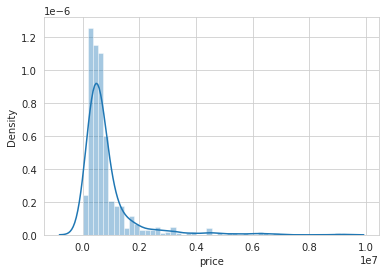

In [75]:
sns.distplot(df_temp['price'])

In [76]:
list(df_temp['name'].sort_values().unique())

['',
 'Audi',
 'Chevrolet Beat',
 'Chevrolet Beat Diesel',
 'Chevrolet Enjoy Petrol',
 'Chevrolet Spark',
 'Datsun',
 'Datsun RediGO',
 'Fiat Grande Punto',
 'Ford Aspire',
 'Ford EcoSport',
 'Ford Endeavour',
 'Ford Endeavour Titanium',
 'Ford Figo Diesel',
 'Ford Figo Diesel Titanium',
 'Ford Figo Petrol',
 'Ford Ikon',
 'Honda',
 'Honda Amaze',
 'Honda Brio',
 'Honda City',
 'Honda City GXi',
 'Honda City i',
 'Honda City i DTec',
 'Honda City i-VTEC',
 'Honda Civic',
 'Honda Jazz',
 'Honda Mobilio',
 'Honda New Accord',
 'Hyundai',
 'Hyundai Creta',
 'Hyundai Elantra',
 'Hyundai Elantra CRDi',
 'Hyundai Getz',
 'Hyundai Grand i10',
 'Hyundai Grand i10 Asta',
 'Hyundai Grand i10 Asta Option',
 'Hyundai Grand i10 CRDi Asta Option',
 'Hyundai Grand i10 CRDi Sportz',
 'Hyundai Grand i10 Magna',
 'Hyundai Grand i10 Nios',
 'Hyundai Grand i10 Sportz',
 'Hyundai Santa Fe',
 'Hyundai Santro',
 'Hyundai Santro Xing',
 'Hyundai Verna',
 'Hyundai Verna CRDi',
 'Hyundai Xcent',
 'Hyundai i10 E

In [77]:
cc={'Chevrolet Beat': '1199',
 'Chevrolet Cruze': '1998',
 'Ford Ecosport': '1498',
 'Ford Figo': '1499',
 'Honda Accord': '1993',
 'Honda Amaze': '1498',
 'Honda City': '1497',
 'Honda Civic': '1799',
 'Honda Jazz': '1199',
 'Hyundai Creta': '1353',
 'Hyundai i20': '998',
 'Hyundai Eon': '814',
 'Hyundai i10': '1197',
 'Hyundai Grand i10 Magna': '1197',
 'Hyundai Grand i10 Sportz1.2': '1186',
 'Hyundai Santro Xing': '1086',
 'Hyundai Xcent': '1197',
 'Mahindra Scorpio': '2179',
 'Maruti Alto': '796',
 'Maruti Baleno': '1197',
 'Maruti Celerio': '998',
 'Maruti Ciaz': '1462',
 'Maruti Dzire': '1197',
 'Maruti Ertiga': '1462',
 'Maruti Ritz': '1197',
 'Maruti Swift': '1197',
 'Maruti Swift Dzire': '1197',
 'Maruti Vitara Brezza': '1462',
 'Maruti Wagon': '1197',
 'Renault Duster': '1330',
 'Tata Tiago': '1199',
 'Toyota Corolla Altis': '1794',
 'Toyota Etios': '1496',
 'Toyota Etios Liva': '1197',
 'Toyota Fortuner': '2755',
 'Toyota Innova': '2393',
 'Toyota Innova Crysta': '2393',
 'Volkswagen Polo': '999',
 'Volkswagen Vento': '999',
 'Hyundai Verna': '1493',
 'Renault Kwid': '999'}

In [78]:
df_car24['cc']=df_car24['name'].map(cc)

In [79]:
df_car24

,Owner,Kilometers Driven,Registration,Year of Purchase,Transmission,Fuel Type,Seating capacity,Max power (bhp),Fuel type,Transmission type,Mileage (kmpl),Heading,Price,c_name,name,cc
0,1,27711,UP,884,MANUAL,Diesel,5,89,Diesel,Manual,24.29,Maruti Vitara Brezza VDI,843699,Maruti,Maruti Vitara Brezza,1462
1,2,66285,DL,2254,MANUAL,Petrol,5,85,Petrol,Manual,18.60,Maruti Swift ZXI,452699,Maruti,Maruti Swift,1197
2,1,72575,HR,2800,MANUAL,Diesel,5,75,Diesel,Manual,14.00,Maruti Swift Dzire VDI BS IV,424999,Maruti,Maruti Swift Dzire,1197
3,1,79600,HR,2131,MANUAL,Diesel,5,89,Diesel,Manual,26.21,Maruti Ciaz VDI,500000,Maruti,Maruti Ciaz,1462
4,3,70965,DL,3165,MANUAL,Petrol,5,67,Petrol,Manual,19.30,Maruti Wagon R 1.0 LXI,230000,Maruti,Maruti Wagon,1197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,1,117419,CH,4018,MANUAL,Petrol,5,85,Petrol,Manual,19.10,Maruti Swift Dzire VXI,285699,Maruti,Maruti Swift Dzire,1197
831,1,78878,DL,2010,MANUAL,Diesel,5,126,Diesel,Manual,19.67,Hyundai Creta 1.6 SX PLUS DIESEL,809199,Hyundai,Hyundai Creta,1353
832,2,124320,CH,2769,MANUAL,Diesel,5,70,Diesel,Manual,24.00,Hyundai Grand i10 ASTA 1.1 CRDI,379599,Hyundai,Hyundai Grand i10,NaN
833,1,127836,PB,2435,MANUAL,Petrol,5,55,Petrol,Manual,21.10,Hyundai Eon MAGNA PLUS,318699,Hyundai,Hyundai Eon,814


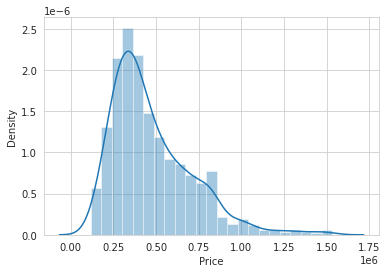

In [80]:
sns.distplot(df_car24['Price'])

In [81]:
df=pd.DataFrame()
df['owner']=df_car24['Owner'].append(df_carwala['No. of Owner(s)']).append(df_cd['No Of Owner(s)']).append(df_temp['No Of Owner(s)'])
df['km']=df_car24['Kilometers Driven'].append(df_carwala['Kilometer']).append(df_cd['KMs Driven']).append(df_temp['KMs Driven'])
df['city']=df_car24['Registration'].append(df_carwala['Car Available at']).append(df_cd['RTO']).append(df_temp['RTO'])
df['year']=df_car24['Year of Purchase'].append(df_carwala['Year']).append(df_cd['Reg. year']).append(df_temp['Make Year'])
df['trans']=df_car24['Transmission'].append(df_carwala['Transmission']).append(df_cd['Transmission']).append(df_temp['Transmission'])
df['ft']=df_car24['Fuel type'].append(df_carwala['Fuel Type']).append(df_cd['Fuel']).append(df_temp['Fuel'])
df['seats']=df_car24['Seating capacity'].append(df_carwala['Person']).append(df_cd['Seats']).append(df_temp['Seats'])
df['c_name']=df_car24['c_name'].append(df_carwala['c_name']).append(df_cd['c_name']).append(df_temp['c_name'])
df['name']=df_car24['name'].append(df_carwala['name']).append(df_cd['name']).append(df_temp['name'])
df['cc']=df_car24['cc'].append(df_carwala['cc']).append(df_cd['Engine']).append(df_temp['Engine'])
df['Price']=df_car24['Price'].append(df_carwala['Price']).append(df_cd['price']).append(df_temp['price'])
df['milage']=df_car24['Mileage (kmpl)'].append(df_carwala['milage']).append(df_cd['Mileage']).append(df_temp['Mileage'])

In [82]:
df

,owner,km,city,year,trans,ft,seats,c_name,name,cc,Price,milage
0,1,27711,UP,884,MANUAL,Diesel,5,Maruti,Maruti Vitara Brezza,1462,843699,24.29
1,2,66285,DL,2254,MANUAL,Petrol,5,Maruti,Maruti Swift,1197,452699,18.6
2,1,72575,HR,2800,MANUAL,Diesel,5,Maruti,Maruti Swift Dzire,1197,424999,14
3,1,79600,HR,2131,MANUAL,Diesel,5,Maruti,Maruti Ciaz,1462,500000,26.21
4,3,70965,DL,3165,MANUAL,Petrol,5,Maruti,Maruti Wagon,1197,230000,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,42000,MH,3165,Automatic,Diesel,5,Audi,Audi,1968,1.325e+06,17.11 kmpl
565,1,176000,MH,4626,Manual,Diesel,5,Maruti,Maruti Swift Dzire VDi,1248,325000,19.3 kmpl
566,1,66000,MH,2435,Manual,Petrol,5,Hyundai,Hyundai i20 Asta Option,1197,549000,18.6 kmpl
567,2,8874,MH,2800,Manual,Petrol,5,Hyundai,Hyundai Grand i10 Magna,1197,372000,18.9 kmpl


In [83]:
df.index=range(df.shape[0])
df['km']=[str(i).replace(',','') for i in df['km']]
df['km']=df['km'].astype(float)
temp=[]
for i in df['seats']:
  a=0
  for j in str(i):
    if j.isdigit():
      temp.append(j)
      a=1
      break
  if a==0:
    temp.append(np.nan)
df['seats']=temp
df['seats']=df['seats'].astype('float')

temp=[]
for i in df['Price']:
  a=0
  temp1=[]
  
  for j in str(i):
    if j.isdigit():
      temp1.append(j)
      a=1
  
  if a==0:
    temp.append(np.nan)
  else:
    temp.append(''.join(temp1))
df['Price']=temp
df['Price']=df['Price'].astype('float')
df['cc']=df['cc'].astype(float)
dic={'MANUAL':'M', 'AUTOMATIC':'A', 'Automatic':'A', 'Manual':'M'}
df['trans']=df['trans'].map(dic)
df['milage']=[str(i).split()[0] for i in df['milage']]
df['milage']=df['milage'].astype('float')

In [84]:
df

,owner,km,city,year,trans,ft,seats,c_name,name,cc,Price,milage
0,1,27711.0,UP,884,M,Diesel,5.0,Maruti,Maruti Vitara Brezza,1462.0,843699.0,24.29
1,2,66285.0,DL,2254,M,Petrol,5.0,Maruti,Maruti Swift,1197.0,452699.0,18.60
2,1,72575.0,HR,2800,M,Diesel,5.0,Maruti,Maruti Swift Dzire,1197.0,424999.0,14.00
3,1,79600.0,HR,2131,M,Diesel,5.0,Maruti,Maruti Ciaz,1462.0,500000.0,26.21
4,3,70965.0,DL,3165,M,Petrol,5.0,Maruti,Maruti Wagon,1197.0,230000.0,19.30
...,...,...,...,...,...,...,...,...,...,...,...,...
5061,1,42000.0,MH,3165,A,Diesel,5.0,Audi,Audi,1968.0,13250000.0,17.11
5062,1,176000.0,MH,4626,M,Diesel,5.0,Maruti,Maruti Swift Dzire VDi,1248.0,3250000.0,19.30
5063,1,66000.0,MH,2435,M,Petrol,5.0,Hyundai,Hyundai i20 Asta Option,1197.0,5490000.0,18.60
5064,2,8874.0,MH,2800,M,Petrol,5.0,Hyundai,Hyundai Grand i10 Magna,1197.0,3720000.0,18.90


# ***EDA***

In [85]:
df.shape

(5066, 12)

In [86]:

df.describe()

,owner,km,year,seats,cc,Price,milage
count,5066.000000,5066.000000,5066.000000,5065.000000,4954.000000,5.066000e+03,4908.000000
mean,1.177063,52847.508291,2110.925780,5.178677,1437.420670,1.218533e+15,19.684835
std,0.423909,36701.789422,1052.609979,0.664089,563.627783,6.934591e+15,4.108804
min,0.000000,500.000000,-61.000000,2.000000,624.000000,1.100000e+01,0.000000
25%,1.000000,27000.000000,1339.000000,5.000000,1197.000000,4.611992e+05,17.050000
50%,1.000000,46435.500000,1918.000000,5.000000,1248.000000,7.911990e+05,20.140000
75%,1.000000,72653.000000,2769.000000,5.000000,1498.000000,7.330000e+06,22.540000
max,4.000000,750000.000000,7914.000000,8.000000,5998.000000,5.150000e+16,47.450000


In [87]:
df.describe(include=['O'])

,city,trans,ft,c_name,name
count,5065,5037,5066,5066,5066
unique,19,2,7,31,327
top,MH,M,Petrol,Maruti,Maruti Swift
freq,958,3830,2881,1881,275


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   owner   5066 non-null   int64  
 1   km      5066 non-null   float64
 2   city    5065 non-null   object 
 3   year    5066 non-null   int64  
 4   trans   5037 non-null   object 
 5   ft      5066 non-null   object 
 6   seats   5065 non-null   float64
 7   c_name  5066 non-null   object 
 8   name    5066 non-null   object 
 9   cc      4954 non-null   float64
 10  Price   5066 non-null   float64
 11  milage  4908 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 475.1+ KB


## **checking null value**

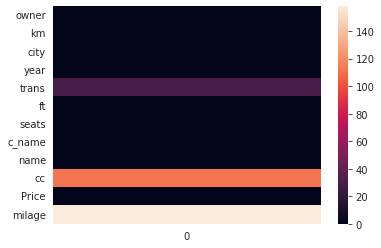

In [89]:
sns.heatmap(df.isnull().sum().to_frame())

In [90]:
pd.set_option('display.max_row', df.shape[1])

In [91]:
for i in df.columns:
  if df[i].isnull().sum()>0:
    print(str(i)+"     "+str(df[i].isnull().sum())+"     "+str(df[i].isnull().sum()/df.shape[0]))


city     1     0.00019739439399921041
trans     29     0.005724437425977102
seats     1     0.00019739439399921041
cc     112     0.022108172127911566
milage     158     0.031188314251875248


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   owner   5066 non-null   int64  
 1   km      5066 non-null   float64
 2   city    5065 non-null   object 
 3   year    5066 non-null   int64  
 4   trans   5037 non-null   object 
 5   ft      5066 non-null   object 
 6   seats   5065 non-null   float64
 7   c_name  5066 non-null   object 
 8   name    5066 non-null   object 
 9   cc      4954 non-null   float64
 10  Price   5066 non-null   float64
 11  milage  4908 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 475.1+ KB


In [93]:
df['name'].loc[df['cc'].isnull()].value_counts()

Hyundai Elite i20    41
Hyundai Grand i10    40
Mahindra             24
Maruti               4 
Honda                3 
Name: name, dtype: int64

Every nan value is mostly Hundai I10 or I20 persent of every nan is very low so we can drop it 

In [94]:
for i in range(df.shape[0]):
  if df['name'][i]=='Hyundai Elite i20':
      df['name'][i]='Hyundai i20'
      df['cc'][i]=998
  if df['name'][i]=='Hyundai Grand i10':
      df['name'][i]='Hyundai i10'
      df['cc'][i]=1197

In [95]:
df.dropna(inplace=True)

In [96]:
df['Price_ss']=np.log(np.array(df['Price']))

In [97]:
ind=[]
for i in df.index:
  if np.abs(df['Price_ss'][i]) >4:
    ind.append(i)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4848 entries, 0 to 5065
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   owner     4848 non-null   int64  
 1   km        4848 non-null   float64
 2   city      4848 non-null   object 
 3   year      4848 non-null   int64  
 4   trans     4848 non-null   object 
 5   ft        4848 non-null   object 
 6   seats     4848 non-null   float64
 7   c_name    4848 non-null   object 
 8   name      4848 non-null   object 
 9   cc        4848 non-null   float64
 10  Price     4848 non-null   float64
 11  milage    4848 non-null   float64
 12  Price_ss  4848 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 690.2+ KB


## **Visualization**

In [99]:
df

,owner,km,city,year,trans,ft,seats,c_name,name,cc,Price,milage,Price_ss
0,1,27711.0,UP,884,M,Diesel,5.0,Maruti,Maruti Vitara Brezza,1462.0,843699.0,24.29,13.645551
1,2,66285.0,DL,2254,M,Petrol,5.0,Maruti,Maruti Swift,1197.0,452699.0,18.60,13.022983
2,1,72575.0,HR,2800,M,Diesel,5.0,Maruti,Maruti Swift Dzire,1197.0,424999.0,14.00,12.959842
3,1,79600.0,HR,2131,M,Diesel,5.0,Maruti,Maruti Ciaz,1462.0,500000.0,26.21,13.122363
4,3,70965.0,DL,3165,M,Petrol,5.0,Maruti,Maruti Wagon,1197.0,230000.0,19.30,12.345835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5061,1,42000.0,MH,3165,A,Diesel,5.0,Audi,Audi,1968.0,13250000.0,17.11,16.399508
5062,1,176000.0,MH,4626,M,Diesel,5.0,Maruti,Maruti Swift Dzire VDi,1248.0,3250000.0,19.30,14.994166
5063,1,66000.0,MH,2435,M,Petrol,5.0,Hyundai,Hyundai i20 Asta Option,1197.0,5490000.0,18.60,15.518439
5064,2,8874.0,MH,2800,M,Petrol,5.0,Hyundai,Hyundai Grand i10 Magna,1197.0,3720000.0,18.90,15.129234


In [100]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4848 entries, 0 to 5065
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   owner     4848 non-null   int64  
 1   km        4848 non-null   float64
 2   city      4848 non-null   object 
 3   year      4848 non-null   int64  
 4   trans     4848 non-null   object 
 5   ft        4848 non-null   object 
 6   seats     4848 non-null   float64
 7   c_name    4848 non-null   object 
 8   name      4848 non-null   object 
 9   cc        4848 non-null   float64
 10  Price     4848 non-null   float64
 11  milage    4848 non-null   float64
 12  Price_ss  4848 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 690.2+ KB


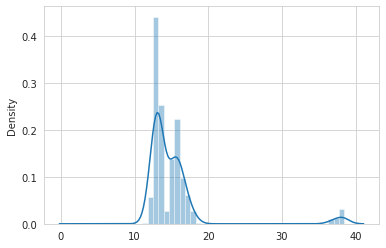

In [101]:
sns.distplot(np.log(np.array(df['Price'])))

In [102]:
df.loc[df['Price_ss']>25]['name'].unique()

array(['Hyundai Santro', 'Maruti Suzuki Swift', 'Ford Ecosport',
       'Honda Amaze', 'Renault Duster', 'Honda Civic',
       'Toyota Etios Liva', 'Maruti Suzuki Swift DZire', 'Honda City',
       'Maruti Suzuki Celerio', 'Hyundai Creta', 'Mahindra XUV500',
       'Hyundai i20 Active', 'Maruti Suzuki DZire', 'BMW 5-Series',
       'MG Hector', 'Maruti Suzuki Ciaz', 'Hyundai Xcent',
       'Toyota Innova', 'Renault Kwid', 'Ford Figo', 'Volkswagen Vento',
       'Honda Brio', 'Honda Jazz', 'Hyundai Venue', 'Mahindra KUV100',
       'Audi A4', 'Audi Q5', 'Hyundai i20', 'Maruti Suzuki Eeco',
       'Maruti Suzuki Alto', 'Tata Nexon', 'Hyundai i10', 'Hyundai Verna',
       'Skoda Laura', 'Maruti Suzuki Vitara Brezza', 'Nissan Sunny',
       'Maruti Suzuki Wagon R', 'Audi Q3', 'Volkswagen Polo',
       'Toyota Corolla Altis', 'Nissan Terrano', 'Honda Mobilio',
       'Skoda Octavia', 'Datsun Redigo', 'Maruti Suzuki Baleno',
       'Ford Fiesta', 'Ford Fiesta/Classic', 'Nissan Micra',
      

In [103]:
df.drop(df.loc[df['Price_ss']>25].index,axis=0,inplace=True)

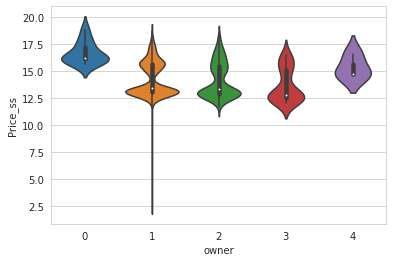

In [104]:
sns.violinplot(y=df['Price_ss'],x=df['owner'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

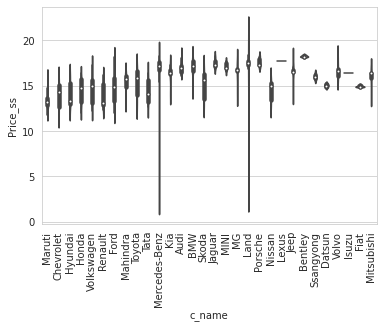

In [105]:
sns.violinplot(y=df['Price_ss'],x=df['c_name'])
plt.xticks(rotation=90) 

In [106]:
cat=[]
for i in df.columns:
  if df[i].dtype == 'O':
    cat.append(i)
  elif np.shape(df[i].unique())[0]< 7:
    cat.append(i)

In [107]:
dis={'Diesel':'Diesel', 'Petrol':'Petrol', 'LPG':'LPG', 'CNG':'CNG', 'Petrol + Cng':'Petrol + Cng', 'CNG + Cng':'CNG',
       'Hybrid':'Hybrid'}
df['ft']=df['ft'].map(dis)


In [108]:
dis={'UP':'UP', 'DL':'DL', 'HR':'HR', 'CH':'CH', 'PB':'PB', 'MH':'MH', 'KA':'KA', 'TN':'TN', 'AP':'AP', 'WB':'WB', 'GJ':'GJ',
       'DLC':'DL', 'TS':'TS', 'RJ':'RJ', 'GJX':'GJ', 'GJR':'GJ', 'GJK':'GJ', 'GJA':'GJ', 'PY':'PY'}
df['city']=df['city'].map(dis)

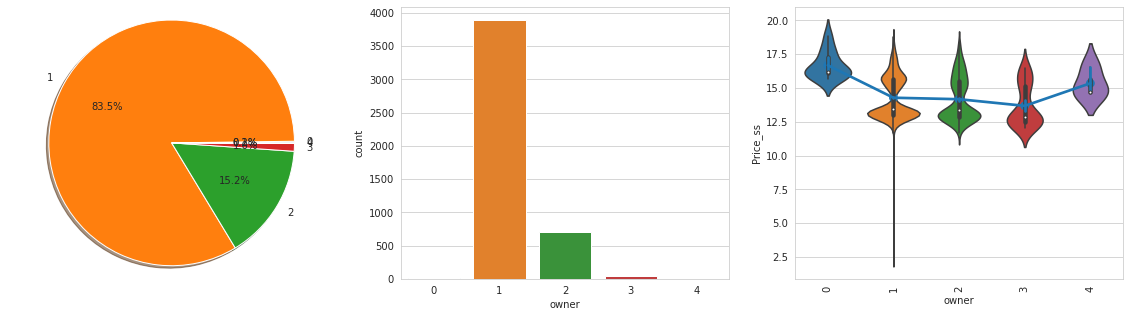

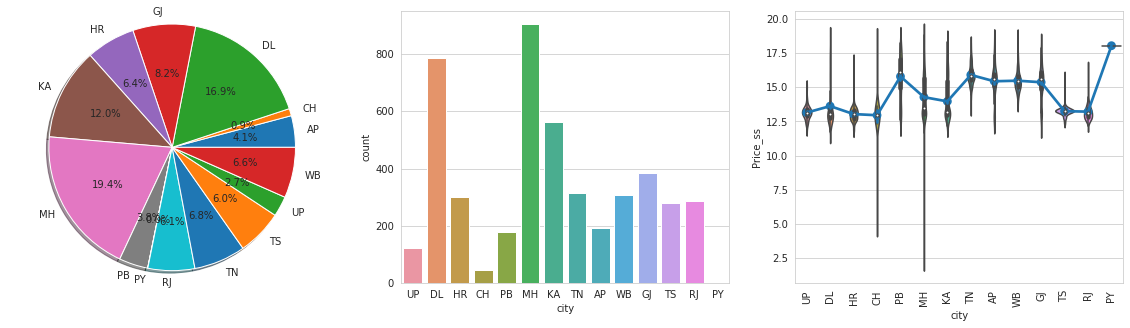

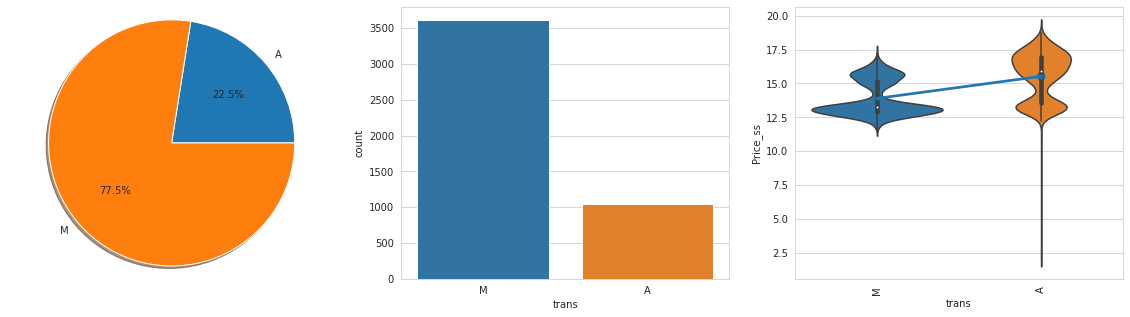

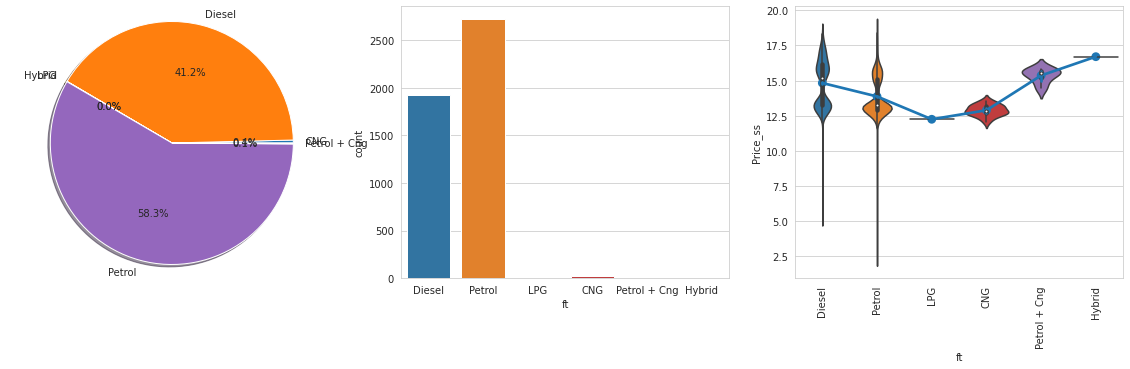

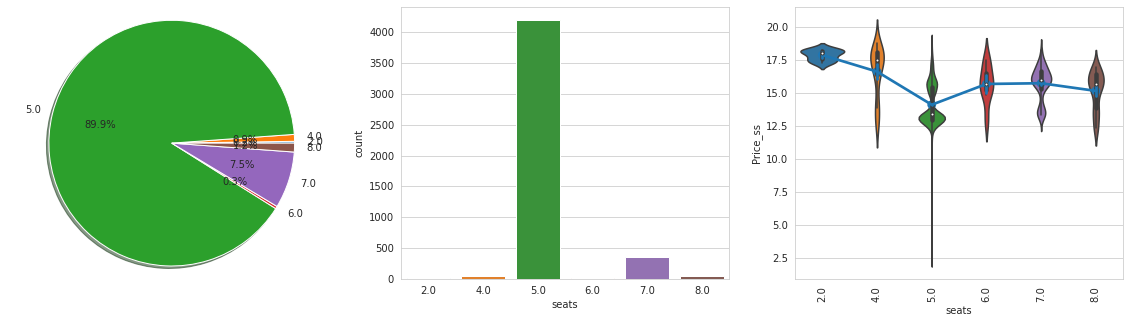

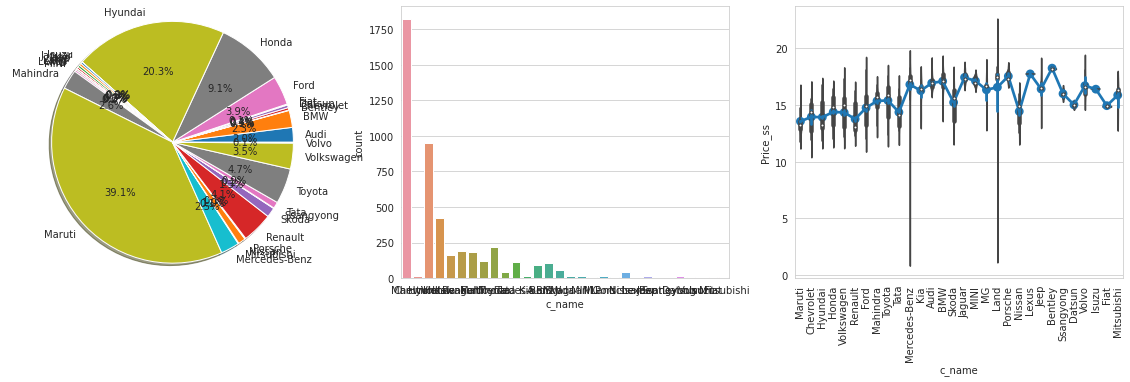

In [109]:

for i in cat[:-1]:
  labels = df[i].astype('category').cat.categories.tolist()
  counts = df[i].value_counts()
  sizes = [counts[var_cat] for var_cat in labels]
  fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
  ax1.axis('equal')
  plt.xlabel(i)
  sns.countplot(x=i,data=df,ax=ax2)
  plt.xticks(rotation=90) 
  sns.violinplot(y='Price_ss',x=i,data=df,ax=ax3)
  sns.pointplot(y='Price_ss',x=i,data=df,ax=ax3)
  plt.xticks(rotation=90) 
  plt.show()
  

Observations:-

 for the first owners, the price is higher than the rest.

City has very good variance but some of the city has approximately same mean so they can be clustered together for better performance of the model. 

The automatic transmission has a higher price than a manual transmission. 

Fuel type has a very good variance in its distribution.





In [157]:
d={'HR': 'a',
 'CH': 'a',
 'UP': 'a',
 'RJ': 'a',
 'TS': 'a',
 'DL': 'b',
 'KA': 'b',
 'MH': 'b',
 'GJ': 'c',
 'AP': 'c',
 'WB': 'c',
 'PB': 'c',
 'TN': 'd',
 'PY': 'd'}

df['city']=df['city'].map(d)

In [110]:
df.loc[df['name']=='']

,owner,km,city,year,trans,ft,seats,c_name,name,cc,Price,milage,Price_ss
4576,1,68000.0,GJ,1704,A,Diesel,5.0,BMW,,1995.0,25900000.0,22.69,17.069754
4584,1,68000.0,GJ,3531,A,Diesel,5.0,BMW,,1995.0,15500000.0,13.20,16.556351
4622,1,18000.0,GJ,974,A,Diesel,5.0,BMW,,1995.0,54000000.0,16.55,17.804495
4656,1,12000.0,GJ,609,A,Diesel,5.0,BMW,,1995.0,39000000.0,20.37,17.479072
4667,2,65000.0,WB,3165,A,Diesel,5.0,BMW,,2993.0,27000000.0,16.77,17.111347
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4937,1,46000.0,WB,2800,A,Diesel,5.0,BMW,,1995.0,13850000.0,17.05,16.443796
4945,2,43425.0,WB,3896,A,Petrol,5.0,BMW,,2497.0,11490000.0,10.80,16.256988
5018,2,22000.0,MH,2435,A,Diesel,5.0,BMW,,1995.0,20500000.0,18.88,16.835935
5040,1,122000.0,MH,2800,A,Diesel,5.0,BMW,,1995.0,13500000.0,13.20,16.418200


In [111]:
df['name']=[i.lower().replace('-',' ').replace(' petrol','').replace(' diesel','') for i in df['name']]

In [112]:
df.drop(df.loc[df['Price']<10000].index,axis=0,inplace=True)

In [113]:
df['name'].sort_values().unique()

array(['', 'audi', 'audi a3', 'audi a4', 'audi a6', 'audi a8', 'audi q3',
       'audi q5', 'audi q7', 'audi q8', 'audi tt',
       'bentley continental flying spur', 'bmw 3 series', 'bmw 5 series',
       'bmw 6 series', 'bmw 6 series gt', 'bmw 7 series', 'bmw i8',
       'bmw x1', 'bmw x3', 'bmw x4', 'bmw x5', 'bmw z4',
       'chevrolet aveo u va', 'chevrolet beat', 'chevrolet cruze',
       'chevrolet enjoy', 'chevrolet spark', 'datsun', 'datsun go',
       'datsun go plus', 'datsun redigo', 'fiat grande punto',
       'fiat punto', 'ford aspire', 'ford ecosport', 'ford endeavour',
       'ford endeavour titanium', 'ford fiesta', 'ford fiesta/classic',
       'ford figo', 'ford figo aspire', 'ford figo titanium', 'ford ikon',
       'ford mustang', 'honda', 'honda accord', 'honda amaze',
       'honda br v', 'honda brio', 'honda city', 'honda city gxi',
       'honda city i', 'honda city i dtec', 'honda city i vtec',
       'honda civic', 'honda cr v', 'honda jazz', 'honda mobilio'

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

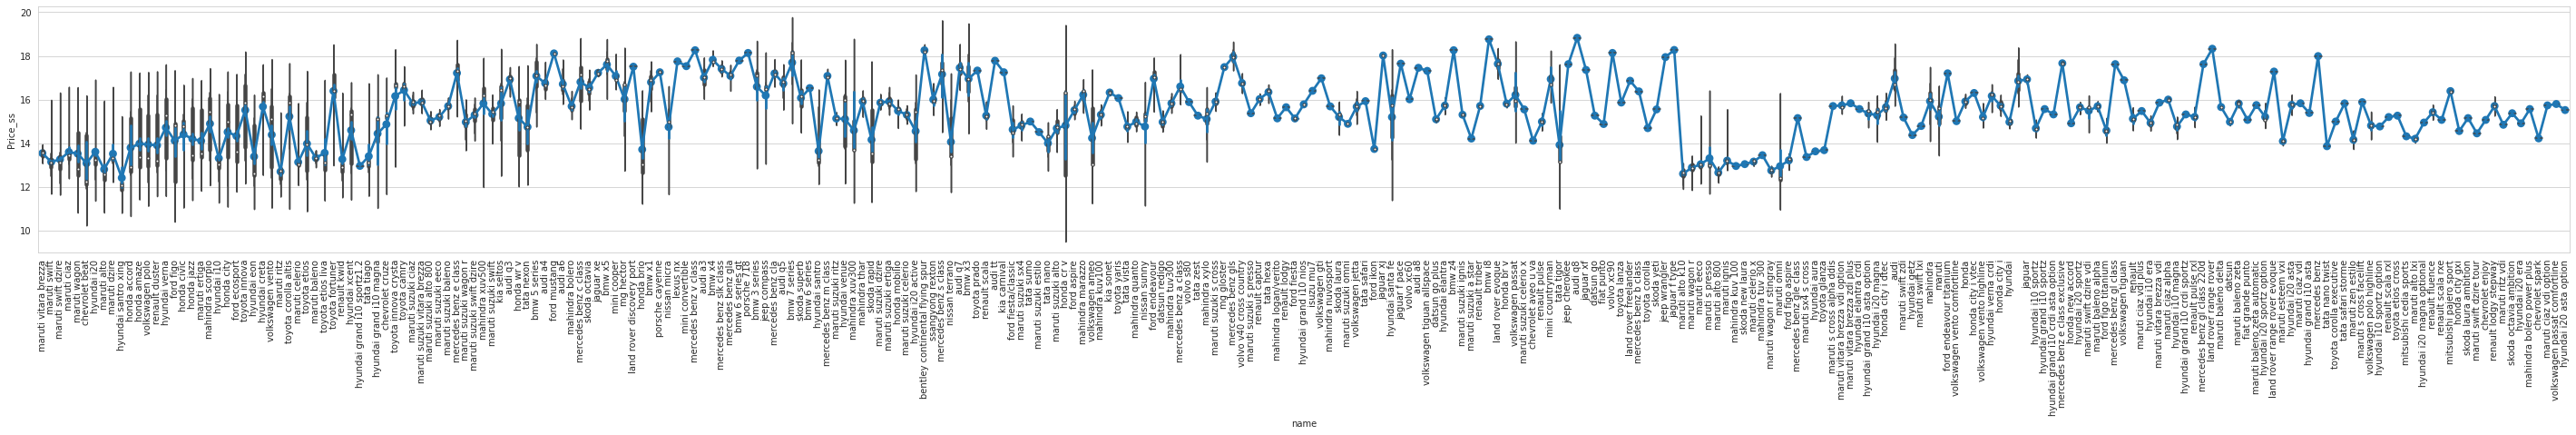

In [114]:
fig1 = plt.subplots(figsize=(50,5))
sns.violinplot(y='Price_ss',x='name',data=df)
sns.pointplot(y='Price_ss',x='name',data=df)
plt.xticks(rotation=90) 

In [115]:
df.skew()

owner       2.190681
km          3.721166
year        0.801432
seats       2.413290
cc          2.647826
Price       4.480155
milage     -0.245654
Price_ss    0.585904
dtype: float64

In [116]:
cat_test=[]
num_test=[]
count=df.nunique()
for i in df.columns:
  if df[i].dtype=='O' or count[i]<11:
    cat_test.append(i)
  elif i not in ['Price','Price_ss']:
    num_test.append(i)

In [117]:
from sklearn.preprocessing import PowerTransformer 
pt=pd.DataFrame()
for i in num_test:
  if df[i].min()<=0:
    pt1=(df[i]-df[i].min()+0.0001)
  else:
    pt1=df[i]
  pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

PT=PowerTransformer()
pt_fit=PT.fit(pt)
pt1=pt_fit.transform(pt)
pt1=pd.DataFrame(pt1,columns=num_test)


In [118]:
pt

,km,year,cc,milage
0,27711.0,945.0001,1462.0,24.2901
1,66285.0,2315.0001,1197.0,18.6001
2,72575.0,2861.0001,1197.0,14.0001
3,79600.0,2192.0001,1462.0,26.2101
4,70965.0,3226.0001,1197.0,19.3001
...,...,...,...,...
5061,42000.0,3226.0001,1968.0,17.1101
5062,176000.0,4687.0001,1248.0,19.3001
5063,66000.0,2496.0001,1197.0,18.6001
5064,8874.0,2861.0001,1197.0,18.9001


In [119]:

pt2=pt_fit.transform(df[num_test])
pt2=pd.DataFrame(pt2,columns=num_test)

In [120]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

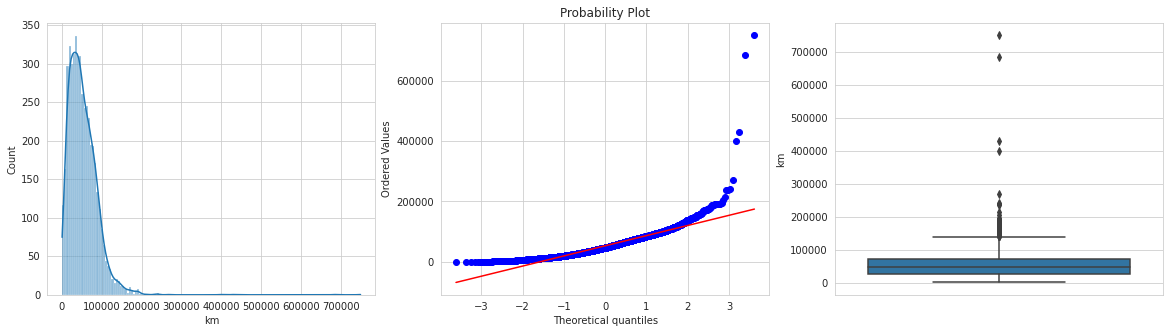

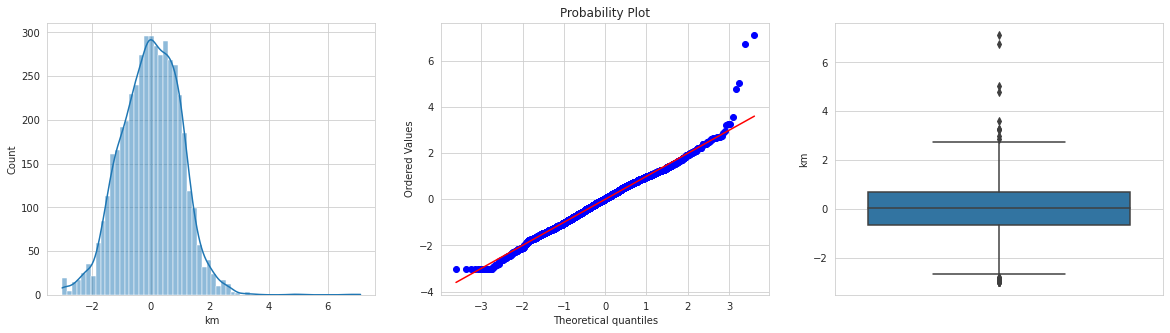

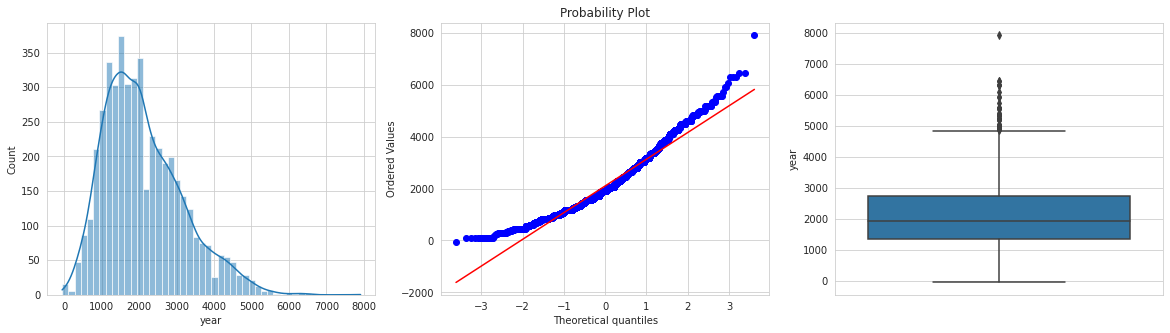

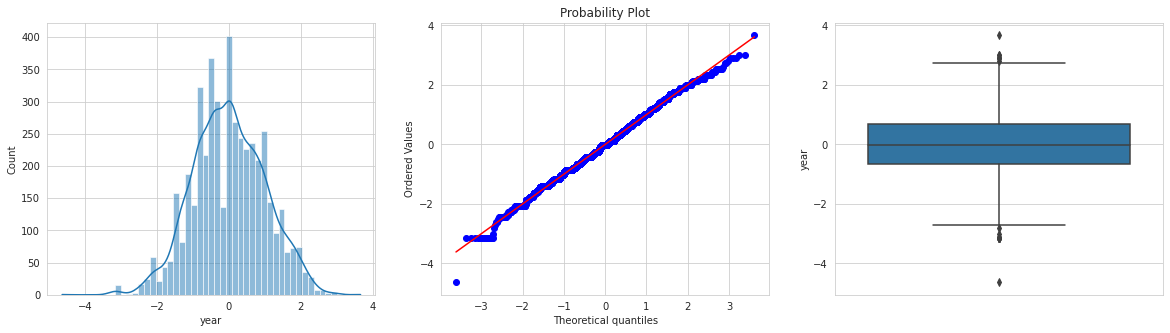

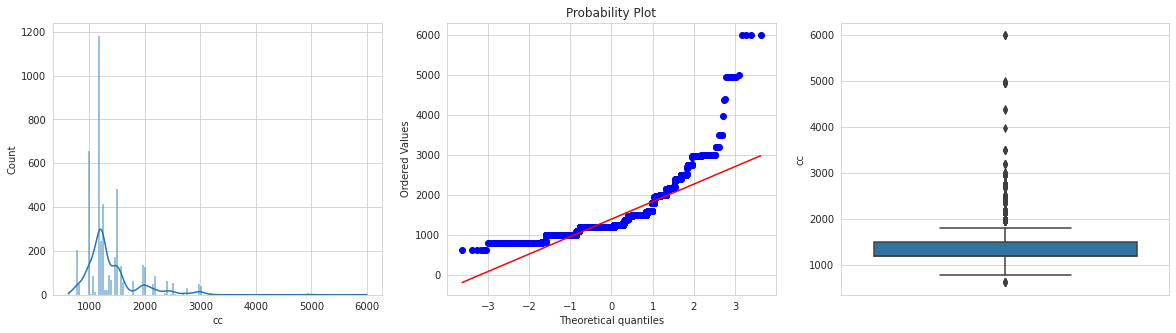

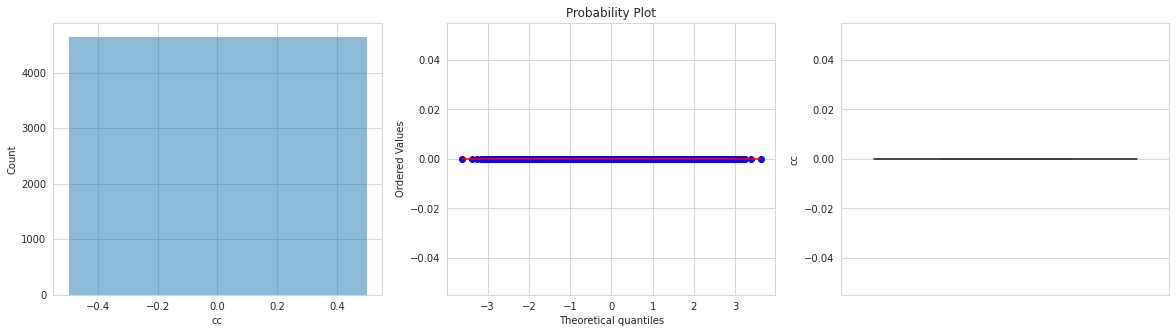

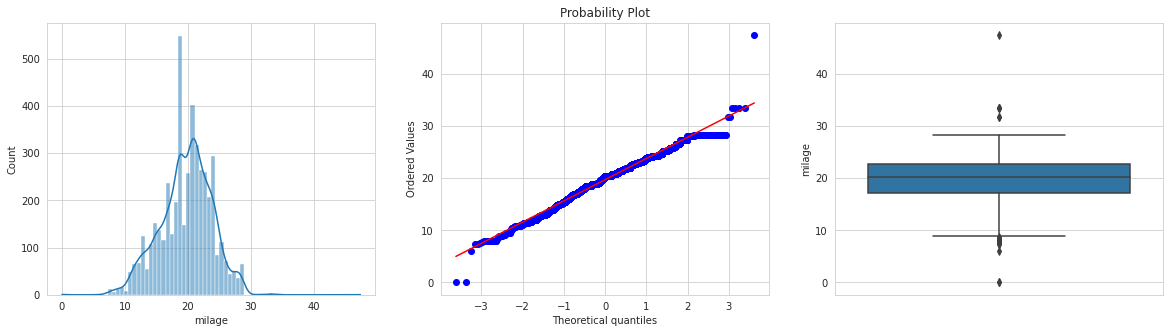

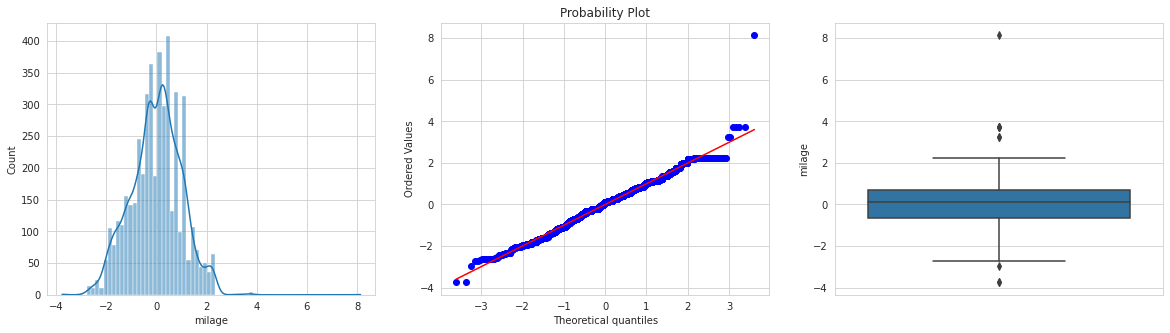

In [121]:
import scipy.stats as stat
import pylab 
#pt1=pd.DataFrame(pt1,columns=num_test)
#pt2=pd.concat([pt1,df.Loan_Status],axis=1)
for i in num_test:
  pplot(df,i)
  pplot(pt1,i)


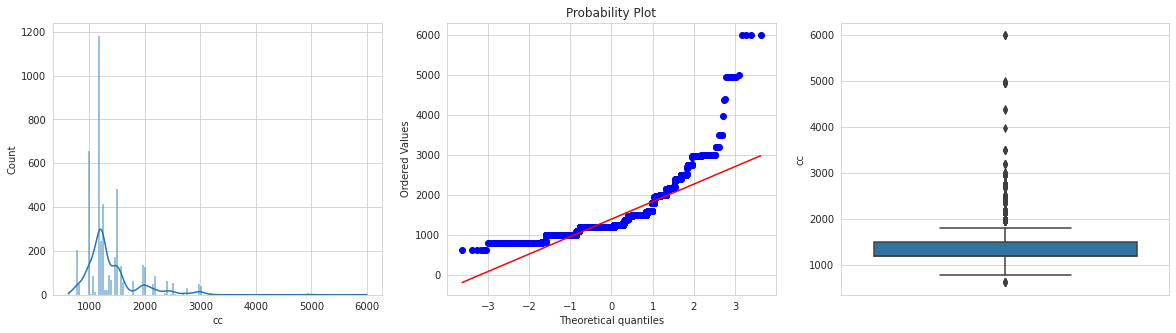

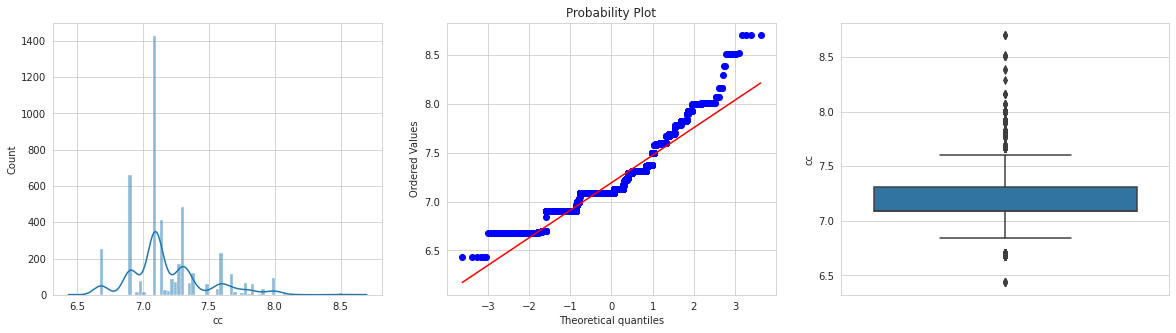

In [122]:
pplot(df,'cc')
df['cc']=np.log(np.array(df['cc']))
pplot(df,'cc')

In [158]:
df1=pd.DataFrame()

In [159]:
df1=pt1.drop('cc',axis=1)

In [160]:
df1

,km,year,milage
0,-0.639822,-1.293052,1.133066
1,0.564116,0.282687,-0.314016
2,0.714169,0.747395,-1.380199
3,0.872607,0.169265,1.649667
4,0.676546,1.029339,-0.143207
...,...,...,...
4657,-0.116176,1.029339,-0.670340
4658,2.493750,2.000518,-0.143207
4659,0.557115,0.443295,-0.314016
4660,-1.708878,0.747395,-0.241073


In [161]:
for i in df.columns:
  if i not in df1.columns:
    df1[i]=df[i]
df1

,km,year,milage,owner,city,trans,ft,seats,c_name,name,cc,Price,Price_ss
0,-0.639822,-1.293052,1.133066,1.0,a,M,Diesel,5.0,Maruti,maruti vitara brezza,7.287561,843699.0,13.645551
1,0.564116,0.282687,-0.314016,2.0,b,M,Petrol,5.0,Maruti,maruti swift,7.087574,452699.0,13.022983
2,0.714169,0.747395,-1.380199,1.0,a,M,Diesel,5.0,Maruti,maruti swift dzire,7.087574,424999.0,12.959842
3,0.872607,0.169265,1.649667,1.0,a,M,Diesel,5.0,Maruti,maruti ciaz,7.287561,500000.0,13.122363
4,0.676546,1.029339,-0.143207,3.0,b,M,Petrol,5.0,Maruti,maruti wagon,7.087574,230000.0,12.345835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,-0.116176,1.029339,-0.670340,1.0,c,A,Petrol,4.0,Audi,audi,7.494430,38500000.0,17.466169
4658,2.493750,2.000518,-0.143207,1.0,c,M,Diesel,8.0,Toyota,toyota innova,7.821643,6250000.0,15.648092
4659,0.557115,0.443295,-0.314016,1.0,c,A,Diesel,5.0,Hyundai,hyundai creta,7.366445,9900000.0,16.108045
4660,-1.708878,0.747395,-0.241073,1.0,c,M,Petrol,5.0,Honda,honda city,7.311218,4250000.0,15.262430


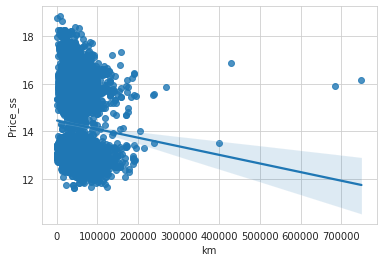

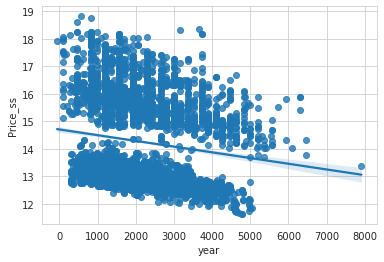

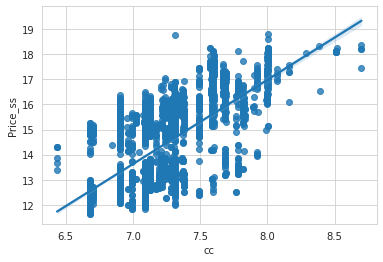

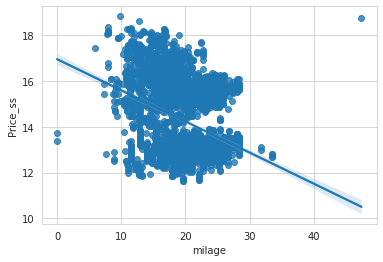

In [162]:

for i in num_test:
  sns.regplot(y='Price_ss',x=i,data=df)
  plt.show()

Price and kilometer are negatively related.

Price and here are negatively related and interestingly to clusters of form by plotting this graph.

Engine capacity is positively related to price.

Price and mileage are negatively related.

By analyzing these continuous variables this can be concluded that clustering these variables can give can generate a very good feature.


In [163]:
df1.drop(['Price'],axis=1,inplace=True)

In [164]:
df1

,km,year,milage,owner,city,trans,ft,seats,c_name,name,cc,Price_ss
0,-0.639822,-1.293052,1.133066,1.0,a,M,Diesel,5.0,Maruti,maruti vitara brezza,7.287561,13.645551
1,0.564116,0.282687,-0.314016,2.0,b,M,Petrol,5.0,Maruti,maruti swift,7.087574,13.022983
2,0.714169,0.747395,-1.380199,1.0,a,M,Diesel,5.0,Maruti,maruti swift dzire,7.087574,12.959842
3,0.872607,0.169265,1.649667,1.0,a,M,Diesel,5.0,Maruti,maruti ciaz,7.287561,13.122363
4,0.676546,1.029339,-0.143207,3.0,b,M,Petrol,5.0,Maruti,maruti wagon,7.087574,12.345835
...,...,...,...,...,...,...,...,...,...,...,...,...
4657,-0.116176,1.029339,-0.670340,1.0,c,A,Petrol,4.0,Audi,audi,7.494430,17.466169
4658,2.493750,2.000518,-0.143207,1.0,c,M,Diesel,8.0,Toyota,toyota innova,7.821643,15.648092
4659,0.557115,0.443295,-0.314016,1.0,c,A,Diesel,5.0,Hyundai,hyundai creta,7.366445,16.108045
4660,-1.708878,0.747395,-0.241073,1.0,c,M,Petrol,5.0,Honda,honda city,7.311218,15.262430


In [165]:
df2=pd.concat([pd.get_dummies(df1['city']),pd.get_dummies(df1['trans']),pd.get_dummies(df1['ft']),df1.drop(['ft','trans','city'],axis=1)],axis=1)

In [166]:
di={}
for i in df2['c_name'].unique():
  temp=df2['Price_ss'].loc[df2['c_name']==i]
  di[i]=np.mean(np.array(temp))
df2['c_name']=df2['c_name'].map(di)

di={}
for i in df2['name'].unique():
  temp=df2['Price_ss'].loc[df2['name']==i]
  di[i]=np.mean(np.array(temp))
df2['name']=df2['name'].map(di)

In [167]:
df2=df2.dropna()

In [168]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4296 entries, 0 to 4661
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   a             4296 non-null   uint8  
 1   b             4296 non-null   uint8  
 2   c             4296 non-null   uint8  
 3   d             4296 non-null   uint8  
 4   A             4296 non-null   uint8  
 5   M             4296 non-null   uint8  
 6   CNG           4296 non-null   uint8  
 7   Diesel        4296 non-null   uint8  
 8   Hybrid        4296 non-null   uint8  
 9   LPG           4296 non-null   uint8  
 10  Petrol        4296 non-null   uint8  
 11  Petrol + Cng  4296 non-null   uint8  
 12  km            4296 non-null   float64
 13  year          4296 non-null   float64
 14  milage        4296 non-null   float64
 15  owner         4296 non-null   float64
 16  seats         4296 non-null   float64
 17  c_name        4296 non-null   float64
 18  name          4296 non-null 

## Generating Feature

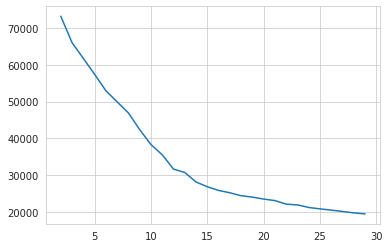

In [169]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
K = range(2, 30)
ss=StandardScaler()
X=ss.fit_transform(df2.drop('Price_ss',axis=1))
wcss=[]
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    wcss.append(kmeanModel.inertia_)
plt.plot(K,wcss)

In [170]:
kmeanModel = KMeans(n_clusters=14)
kmeanModel.fit(X)
Cluster=kmeanModel.predict(X)
df2['Cluster']=Cluster



In [171]:
df2.shape[0]

4296

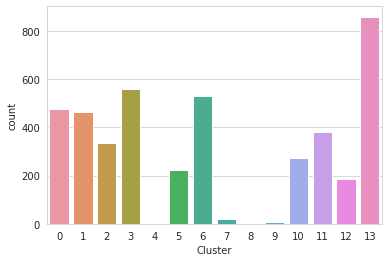

In [172]:
sns.countplot(x='Cluster',data=df2)

## **Changing Data type**

In [282]:
df_encoding=df2.astype(float)

In [283]:
df_encoding.index=range(df_encoding.shape[0])

In [284]:
x=df_encoding.drop('Price_ss',axis=1)
y=df_encoding['Price_ss']

In [256]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   a             4296 non-null   float64
 1   b             4296 non-null   float64
 2   c             4296 non-null   float64
 3   d             4296 non-null   float64
 4   A             4296 non-null   float64
 5   M             4296 non-null   float64
 6   CNG           4296 non-null   float64
 7   Diesel        4296 non-null   float64
 8   Hybrid        4296 non-null   float64
 9   LPG           4296 non-null   float64
 10  Petrol        4296 non-null   float64
 11  Petrol + Cng  4296 non-null   float64
 12  km            4296 non-null   float64
 13  year          4296 non-null   float64
 14  milage        4296 non-null   float64
 15  owner         4296 non-null   float64
 16  seats         4296 non-null   float64
 17  c_name        4296 non-null   float64
 18  name          4296 non-null 

In [257]:
df_encoding

,a,b,c,d,A,M,CNG,Diesel,Hybrid,LPG,Petrol,Petrol + Cng,km,year,milage,owner,seats,c_name,name,cc,Price_ss,Cluster
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.639822,-1.293052,1.133066,1.0,5.0,13.459206,13.542423,7.287561,13.645551,11.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.564116,0.282687,-0.314016,2.0,5.0,13.459206,13.071424,7.087574,13.022983,5.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.714169,0.747395,-1.380199,1.0,5.0,13.459206,13.098936,7.087574,12.959842,11.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.872607,0.169265,1.649667,1.0,5.0,13.459206,13.429574,7.287561,13.122363,11.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.676546,1.029339,-0.143207,3.0,5.0,13.459206,12.789914,7.087574,12.345835,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.116176,1.029339,-0.670340,1.0,4.0,16.956164,17.260998,7.494430,17.466169,2.0
4292,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.493750,2.000518,-0.143207,1.0,8.0,15.311467,15.482788,7.821643,15.648092,10.0
4293,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.557115,0.443295,-0.314016,1.0,5.0,13.810416,15.613541,7.366445,16.108045,2.0
4294,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.708878,0.747395,-0.241073,1.0,5.0,14.231679,14.473989,7.311218,15.262430,3.0


In [ ]:
num_test.append('Price_ss')

## **Correlation**

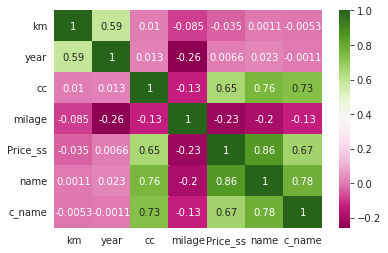

In [273]:
n_t1=num_test
n_t1.append('name')
n_t1.append('c_name')
sns.heatmap(df_encoding[num_test].corr(),annot=True,cmap='PiYG')

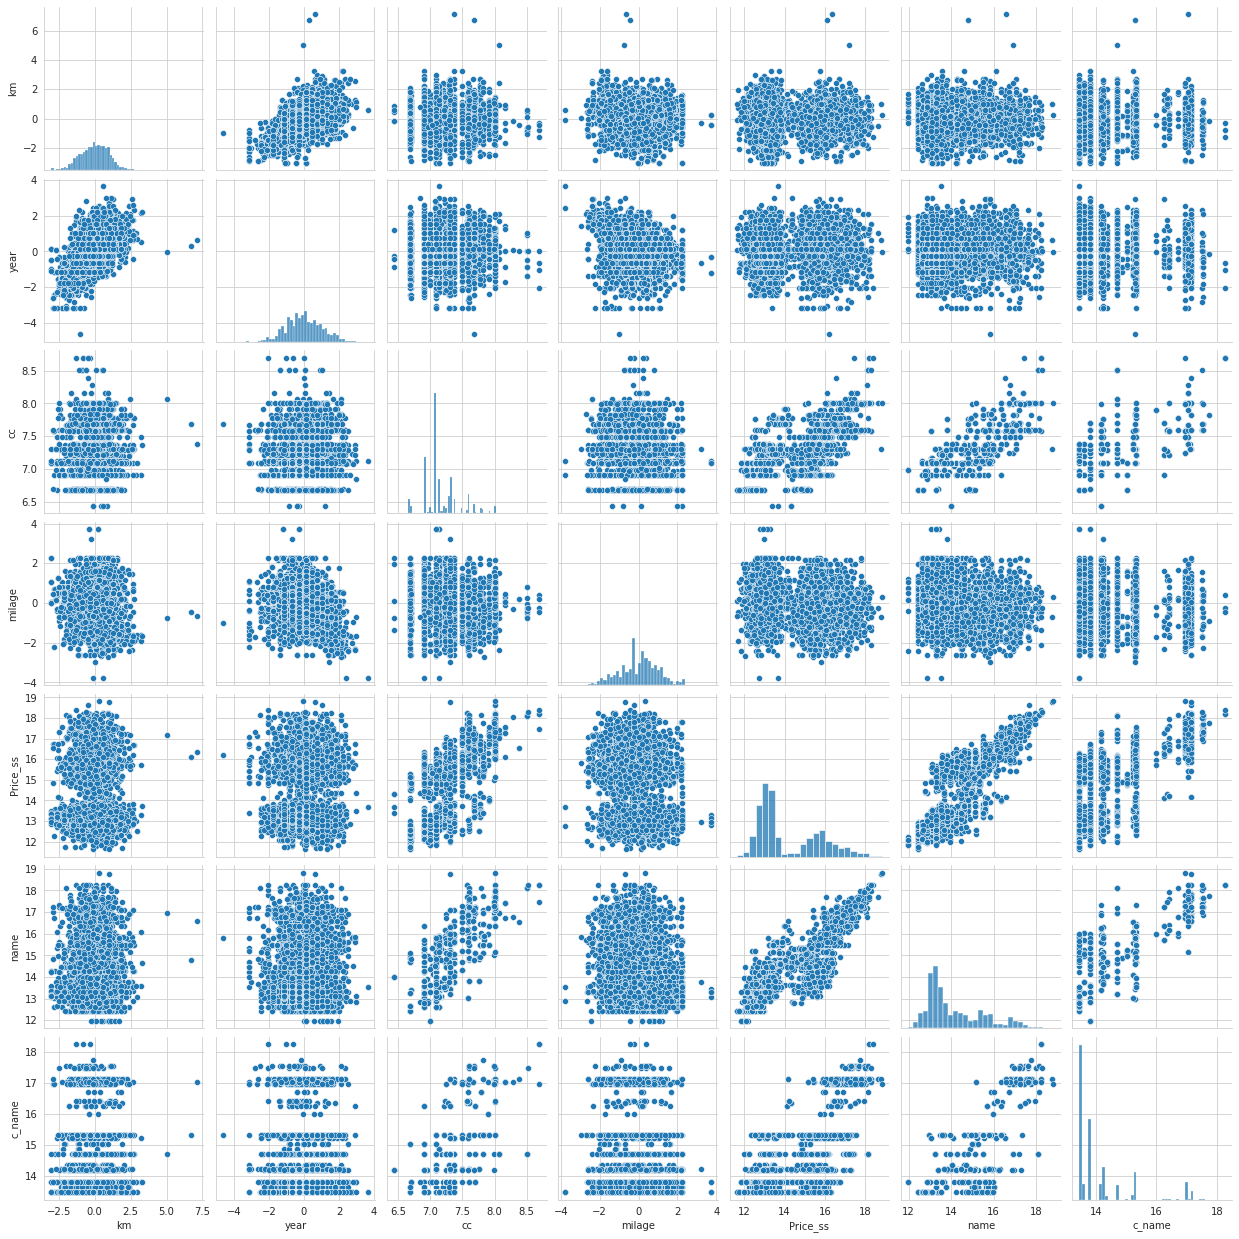

In [274]:
sns.pairplot(df_encoding[num_test])

## **anova test**

In [275]:
from sklearn.feature_selection import SelectKBest,f_classif
s = SelectKBest(f_classif, k=12)
s.fit(x,y)

SelectKBest(k=12, score_func=<function f_classif at 0x7fe738bb0950>)

In [276]:
pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0).head(10)

,0,1
Petrol + Cng,0.195327,1.000000e+00
d,0.563490,1.000000e+00
year,1.048839,1.381694e-01
km,1.194444,2.420923e-05
milage,1.335431,1.684191e-11
seats,1.481620,8.869353e-20
c,1.793715,1.652387e-41
owner,2.324133,2.723186e-84
Cluster,2.558416,5.900773e-104
b,2.645145,3.001287e-111


In [285]:
x.drop(['Petrol + Cng','d','year'],axis=1,inplace=True)
num_test.remove('year')

## **Separating dependent and independent variables**

In [286]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.1,random_state=42)

In [287]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

In [288]:
def z_outlier(a,b):
  df_z=pd.concat([a,b],axis=1)
  z=np.abs(stat.zscore(df_z[num_test]))
  a=int(df_z.size)
  df_z = df_z[(z<3).all(axis=1)]
  print('Percent of data retained = '+ str(int(df_z.size)/a))
  x_z=df_z.drop('Price_ss',axis=1)
  y_z=df_z.Price_ss
  return(x_z,y_z)

In [289]:
x_train,y_train=z_outlier(x_train,y_train)


Percent of data retained = 0.9803414381789963


In [290]:
x_train_scaler= ss.transform(x_train)

# **Model Evaluation**

In [291]:
pip install catboost

     |████████████████████████████████| 67.4 MB 76 kB/s 


# **Model Evaluation**

## **Linear Regression**



In [329]:
from sklearn.linear_model import LinearRegression as lr
reg_lr = lr(normalize=True).fit(x_train_scaler,y_train)
y_pred=reg_lr.predict(x_test_scaler)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
lr_e=r2_score(y_test,y_pred)

0.8025346173331565
0.535708660374098


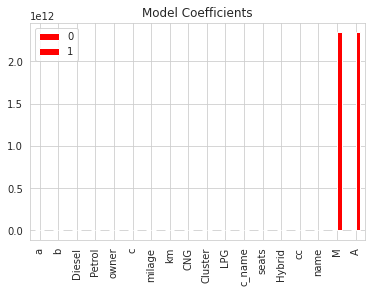

In [330]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
pd.concat([coef[:10],coef[-10:]],axis=1).plot(kind='bar', title="Model Coefficients" , color = 'red')

In [331]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lr(normalize=True), ss.transform(x), y, cv=3,scoring='r2')

lr_reg=cv_results['test_score'].mean()

In [332]:
lr_reg

-7.278344098919009e+53

## **BayesianRidge**

In [333]:
from sklearn.linear_model import BayesianRidge
reg_lr = BayesianRidge().fit(X=x_train,y=y_train)
y_pred=reg_lr.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
ridge_e=r2_score(y_test,y_pred)

0.8030826770624884
0.5352297296261571


<Figure size 720x720 with 0 Axes>

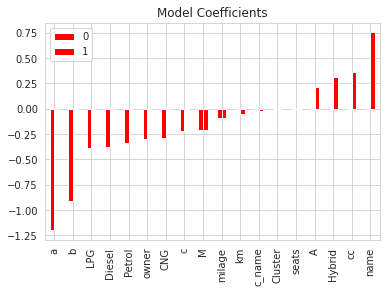

In [334]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
plt.figure(figsize=(10,10))
pd.concat([coef[:10],coef[-10:]],axis=1).plot(kind='bar', title="Model Coefficients" , color = 'red')

In [335]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(BayesianRidge(), x, y, cv=3,scoring='r2')

rid_reg=cv_results['test_score'].mean()

In [336]:
rid_reg

0.7077332801375897

## **Random Forest Regressor**


In [300]:
from sklearn.ensemble import RandomForestRegressor as RFR 
reg_rfc = RFR().fit(x_train, y=y_train)
y_pred=reg_rfc.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
rfr_e=r2_score(y_test,y_pred)

0.8453607889996981
0.3959061613366619


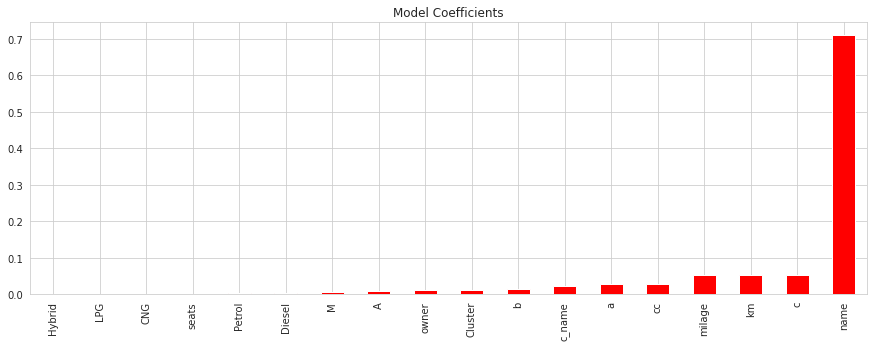

In [301]:
coef = pd.Series(reg_rfc.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(15,5))
coef.iloc[-20:].plot(kind='bar', title="Model Coefficients" , color = 'red')

In [337]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFR(), x, y, cv=3,scoring='r2')

rfc_score=cv_results['test_score']


In [338]:
rfc_reg=rfc_score.mean()

In [339]:
rfc_reg

0.6501867664409287

## **XGB Regressor**

In [305]:
from xgboost import XGBRegressor as XBR
xgr=XBR().fit(x_train,y_train)

y_pred = xgr.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
xgb_e=r2_score(y_test,y_pred)

[10:55:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8350972638461874
0.4387142203643523


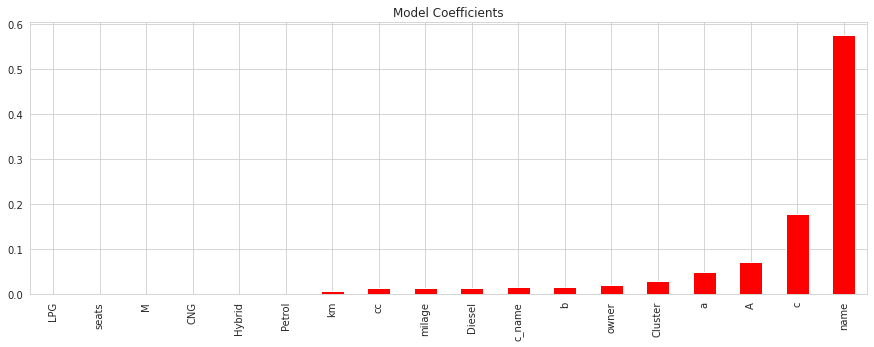

In [306]:
coef = pd.Series(xgr.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(15,5))
coef.iloc[-20:].plot(kind='bar', title="Model Coefficients" , color = 'red')

In [307]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBR(), x, y, cv=3,scoring='r2')

xgr_score=cv_results['test_score'].mean()




[10:55:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [308]:
xgr_score

0.7091750133574344

## **Extra Tree Regressor**

In [309]:
from sklearn.tree import ExtraTreeRegressor as ETR 

etr = ETR()
etr.fit(x_train, y_train)
y_pred=etr.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
etr_e=r2_score(y_test,y_pred)

0.7157748663464145
0.48085151865326553


In [310]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETR(), x, y, cv=3,scoring='r2')

etc_score=cv_results['test_score'].mean()


In [311]:
etc_score

0.4244028967851701

## **Support vector Regressor**

In [312]:
from sklearn.svm import SVR

svc = SVR(kernel='linear')
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
svm_e=r2_score(y_test,y_pred)

0.7857051385428443
0.5333883085058808


In [313]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(kernel='linear'), x, y, cv=3,scoring='r2')

svc_score=cv_results['test_score'].mean()


In [314]:
svc_score

0.6877474622875978

## **CatBoostRegressor**

In [315]:
from catboost import CatBoostRegressor
catb = CatBoostRegressor()
catb.fit(x_train, y_train)
y_pred=catb.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
cat_e=r2_score(y_test,y_pred)

Learning rate set to 0.049476
0:	learn: 1.4505648	total: 49.9ms	remaining: 49.8s
1:	learn: 1.4005995	total: 52ms	remaining: 26s
2:	learn: 1.3541572	total: 53.8ms	remaining: 17.9s
3:	learn: 1.3093039	total: 55.6ms	remaining: 13.8s
4:	learn: 1.2675677	total: 57.6ms	remaining: 11.5s
5:	learn: 1.2306738	total: 59.3ms	remaining: 9.83s
6:	learn: 1.1967295	total: 61ms	remaining: 8.65s
7:	learn: 1.1601790	total: 62.6ms	remaining: 7.76s
8:	learn: 1.1263373	total: 64.3ms	remaining: 7.08s
9:	learn: 1.0923124	total: 65.9ms	remaining: 6.53s
10:	learn: 1.0626878	total: 67.5ms	remaining: 6.07s
11:	learn: 1.0362739	total: 69.1ms	remaining: 5.69s
12:	learn: 1.0121290	total: 70.7ms	remaining: 5.37s
13:	learn: 0.9874715	total: 73.4ms	remaining: 5.17s
14:	learn: 0.9647610	total: 75.5ms	remaining: 4.96s
15:	learn: 0.9433395	total: 78.4ms	remaining: 4.82s
16:	learn: 0.9236584	total: 81.9ms	remaining: 4.74s
17:	learn: 0.9075488	total: 83.6ms	remaining: 4.56s
18:	learn: 0.8889054	total: 85.3ms	remaining: 4.4s

In [316]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(catb, x, y, cv=3,scoring='r2')

cat_score=cv_results['test_score'].mean()

Learning rate set to 0.04707
0:	learn: 1.4184054	total: 2.36ms	remaining: 2.36s
1:	learn: 1.3650986	total: 6.34ms	remaining: 3.16s
2:	learn: 1.3158598	total: 8.14ms	remaining: 2.7s
3:	learn: 1.2700973	total: 9.84ms	remaining: 2.45s
4:	learn: 1.2243440	total: 11.8ms	remaining: 2.36s
5:	learn: 1.1826409	total: 13.8ms	remaining: 2.28s
6:	learn: 1.1453525	total: 15.8ms	remaining: 2.23s
7:	learn: 1.1063792	total: 17.6ms	remaining: 2.18s
8:	learn: 1.0720655	total: 19.4ms	remaining: 2.14s
9:	learn: 1.0383817	total: 21.2ms	remaining: 2.1s
10:	learn: 1.0055080	total: 22.9ms	remaining: 2.06s
11:	learn: 0.9747560	total: 24.6ms	remaining: 2.03s
12:	learn: 0.9467781	total: 26.4ms	remaining: 2s
13:	learn: 0.9200537	total: 28.4ms	remaining: 2s
14:	learn: 0.8957174	total: 30.2ms	remaining: 1.98s
15:	learn: 0.8714003	total: 32.2ms	remaining: 1.98s
16:	learn: 0.8479701	total: 34.1ms	remaining: 1.97s
17:	learn: 0.8260067	total: 36ms	remaining: 1.96s
18:	learn: 0.8050761	total: 37.8ms	remaining: 1.95s
19:

## **Comparing models**

In [317]:
score=[lr_reg,rid_reg,rfc_reg,xgr_score,etc_score,svc_score,cat_score]
error=[lr_e,ridge_e,rfr_e,xgb_e,etr_e,svm_e,cat_e]
name=['LR','Ridge','RFC','XGB','ETC','SVC','cat']
diff=[]
for i in range(7):
  diff.append(score[i]-error[i])
pd.DataFrame([name,score,error,diff]).T

,0,1,2,3
0,LR,-1.37285e+24,0.80251,-1.37285e+24
1,Ridge,0.707733,0.803083,-0.0953494
2,RFC,0.652919,0.845361,-0.192441
3,XGB,0.709175,0.835097,-0.125922
4,ETC,0.424403,0.715775,-0.291372
5,SVC,0.687747,0.785705,-0.0979577
6,cat,0.689899,0.861772,-0.171874


Ridge is the best model the best model 

# **Hyper-parameter tuning** 

## **XGB**




In [340]:
from sklearn.model_selection import RandomizedSearchCV
xgb_params = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
              "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
              "min_child_weight" : [ 1, 3, 5, 7 ],
              "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
              'n_estimators':[10000,1000,5000],
              'reg_alpha':[1e-5, 1e-2,  0.75],
              'reg_lambda':[1e-5, 1e-2, 0.45]
               }

xg_grid = RandomizedSearchCV(XBR(), xgb_params, cv=3, scoring='r2')
xg_grid.fit(x_train, y_train)

print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

[11:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:18:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:21:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:21:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [320]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBR(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.01, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1), x, y, cv=3)

hp_xbr=cv_results['test_score']

[11:05:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:05:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:05:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [321]:
hp_xbr.mean()

0.6366055050948766

In [322]:
xg=XBR(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.01, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xg.fit(x,y)

[11:06:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.01, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# **prediction**

In [323]:
from sklearn.metrics import mean_absolute_error as rms, r2_score
y_pred=xg.predict(x)
print(r2_score(y,y_pred))
print(rms(y,y_pred))

0.9781725974368901
0.14964390088437593


In [324]:
y_test_pred=xg.predict(x_test)

# **Saving the model** 

In [325]:
import pickle

filename = '/content/model.sav'
pickle.dump(xg, open(filename, 'wb'))

# **Conclusion**

In [326]:

filename = '/content/model.sav'
model = pickle.load(open(filename, 'rb'))

[11:06:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [327]:
y_pred = model.predict(x)

In [328]:
pd.concat([pd.DataFrame(np.exp(y_pred)),pd.DataFrame(np.exp(y))],axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4256,4257,4258,4259,4260,4261,4262,4263,4264,4265,4266,4267,4268,4269,4270,4271,4272,4273,4274,4275,4276,4277,4278,4279,4280,4281,4282,4283,4284,4285,4286,4287,4288,4289,4290,4291,4292,4293,4294,4295
0,707914.375,394406.9375,398453.6875,621626.4375,223287.921875,184758.9375,453596.0625,242431.546875,446860.6875,540195.3125,462157.5,556957.75,627384.375,839703.625,362517.125,150692.765625,631651.125,237517.25,283427.15625,336334.84375,384265.8125,409905.625,295031.40625,543391.0625,347348.65625,638811.5625,505246.6875,199288.703125,334501.625,227551.453125,246004.9375,488588.84375,423323.75,362867.53125,445575.9375,280964.15625,568970.0625,552537.5625,379314.03125,388076.75,...,6678284.0,46332572.0,46567084.0,18517772.0,50172136.0,9779459.0,16846222.0,16624413.0,3993513.5,6412002.5,16194860.0,4862982.0,28971188.0,5244420.5,2520157.5,11975188.0,8073491.5,10659367.0,7165635.0,3603471.5,8318205.5,7604318.0,9603468.0,10808617.0,2387122.75,4925695.0,8755005.0,6606375.0,3856192.0,5731458.0,6754931.0,5443872.0,10659367.0,7499679.5,35234788.0,36966472.0,5599426.0,9944420.0,3378788.0,3523328.75
Price_ss,843699.000,452699.0000,424999.0000,500000.0000,230000.000000,185000.0000,345000.0000,310099.000000,625000.0000,478999.0000,415699.0,576099.00,644999.000,750000.000,371699.000,139000.000000,614099.000,274000.00,325000.00000,335999.00000,276999.0000,255000.000,244000.00000,706000.0000,189499.00000,499899.0000,470000.0000,212699.000000,289799.000,180000.000000,251599.0000,345000.00000,379799.00,356499.00000,440000.0000,249000.00000,455999.0000,717299.0000,406799.00000,357899.00,...,7750000.0,45000000.0,54000000.0,21500000.0,52000000.0,10500000.0,18500000.0,14500000.0,3700000.0,5750000.0,18450000.0,4750000.0,30000000.0,5250000.0,2750000.0,13250000.0,7900000.0,8910000.0,7700000.0,4000000.0,8900000.0,8500000.0,9750000.0,11500000.0,2700000.00,4500000.0,9250000.0,6000000.0,3500000.0,6000000.0,6500000.0,7250000.0,13900000.0,6950000.0,39000000.0,38500000.0,6250000.0,9900000.0,4250000.0,4000000.00
